In [189]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
import logging


In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
# Set up paths
script_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(script_dir, os.pardir))
tableu_dir = os.path.join(root_dir, 'tableau')
porcessed_data_dir = os.path.join(script_dir, 'processed_data')

In [192]:
output_df = pd.read_csv(os.path.join(tableu_dir, 'bardis_ensemble_python_ver_100.csv'))
output_df

Resources   Economy   Bureaucracy  Pollution   time  run_id
0        1.000000  0.100000  1.000000e-02   0.001000    0.0     1.0
1        0.999951  0.100172  1.004647e-02   0.001101    0.2     1.0
2        0.999901  0.100345  1.009319e-02   0.001203    0.4     1.0
3        0.999849  0.100519  1.014014e-02   0.001304    0.6     1.0
4        0.999796  0.100694  1.018734e-02   0.001406    0.8     1.0
...           ...       ...           ...        ...    ...     ...
100095   0.000209  0.020162  9.452395e-07   1.143534  199.2   100.0
100096   0.000209  0.020162  9.224389e-07   1.143534  199.4   100.0
100097   0.000209  0.020162  9.001884e-07   1.143534  199.6   100.0
100098   0.000209  0.020162  8.784745e-07   1.143534  199.8   100.0
100099   0.000209  0.020162  8.572844e-07   1.143534  200.0   100.0

[100100 rows x 6 columns]

In [193]:
output_df.min()

Resources      3.688220e-06
Economy        2.822054e-04
Bureaucracy    9.963573e-18
Pollution      1.000000e-03
time           0.000000e+00
run_id         1.000000e+00
dtype: float64

In [194]:
fe = FeatureExtractor()
edau = EDAUtils()

# Time Series Clustering (Simple Approach)

## Create freatures df

In [195]:
transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()
transformed_output_df.head() 

/tmp/ipykernel_14325/2261743549.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()


run_id  Resources_final  Resources_max  Resources_min  Resources_auc  \
0     1.0         0.013482            1.0       0.012950      67.206526   
1     2.0         0.000045            1.0       0.000045      51.009895   
2     3.0         0.010809            1.0       0.010809      70.233630   
3     4.0         0.016318            1.0       0.016318      74.944802   
4     5.0         0.000137            1.0       0.000137      64.836249   

   Resources_final_initial_diff  Resources_delta_25  Resources_delta_50  \
0                     -0.986518           -0.001908           -0.008547   
1                     -0.999955           -0.005797           -0.019693   
2                     -0.989191           -0.002555           -0.007302   
3                     -0.983682           -0.004887           -0.008939   
4                     -0.999863           -0.003191           -0.009570   

   Resources_delta_75  Resources_delta_100  ...  Pollution_auc  \
0           -0.039775            -0.000163  ...     116.316926   
1           -0.005408            -0.000003  ...     123.070621   
2           -0.025920            -0.002112  ...     113.628081   
3           -0.011405            -0.008193  ...      50.121846   
4           -0.027257            -0.000636  ...      89.860313   

   Pollution_final_initial_diff  Pollution_delta_25  Pollution_delta_50  \
0                      1.014576            0.000732            0.001455   
1                      1.070811            0.001877            0.003324   
2                      1.052842            0.001446            0.002349   
3                      0.450646            0.001870            0.002926   
4                      0.869236            0.001066            0.001869   

   Pollution_delta_75  Pollution_delta_100  Pollution_delta_125  \
0            0.008233             0.016480             0.000056   
1            0.009279             0.024890             0.001662   
2            0.005376             0.034101             0.003066   
3            0.003631             0.003365             0.002713   
4            0.003498             0.022283             0.005552   

   Pollution_delta_150  Pollution_delta_175  Pollution_delta_200  
0             0.000013             0.000013             0.000013  
1             0.000063             0.000003             0.000001  
2             0.000078             0.000017             0.000016  
3             0.001786             0.000906             0.000415  
4             0.000136             0.000005             0.000003  

[5 rows x 53 columns]

In [196]:
transformed_output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   run_id                          100 non-null    float64
 1   Resources_final                 100 non-null    float64
 2   Resources_max                   100 non-null    float64
 3   Resources_min                   100 non-null    float64
 4   Resources_auc                   100 non-null    float64
 5   Resources_final_initial_diff    100 non-null    float64
 6   Resources_delta_25              100 non-null    float64
 7   Resources_delta_50              100 non-null    float64
 8   Resources_delta_75              100 non-null    float64
 9   Resources_delta_100             100 non-null    float64
 10  Resources_delta_125             100 non-null    float64
 11  Resources_delta_150             100 non-null    float64
 12  Resources_delta_175             100 n

## Data Cleaning

- Drop duplicates?

In [197]:
transformed_output_df.isnull().sum().sort_values(ascending=False).head()


run_id             0
Resources_final    0
Resources_max      0
Resources_min      0
Resources_auc      0
dtype: int64

In [198]:
# Check for duplicates
transformed_output_df.duplicated().sum()

np.int64(0)

In [199]:
# Drop run_id to create features dataframe
features_df = transformed_output_df.drop(columns=["run_id"])
features_df.head()

Resources_final  Resources_max  Resources_min  Resources_auc  \
0         0.013482            1.0       0.012950      67.206526   
1         0.000045            1.0       0.000045      51.009895   
2         0.010809            1.0       0.010809      70.233630   
3         0.016318            1.0       0.016318      74.944802   
4         0.000137            1.0       0.000137      64.836249   

   Resources_final_initial_diff  Resources_delta_25  Resources_delta_50  \
0                     -0.986518           -0.001908           -0.008547   
1                     -0.999955           -0.005797           -0.019693   
2                     -0.989191           -0.002555           -0.007302   
3                     -0.983682           -0.004887           -0.008939   
4                     -0.999863           -0.003191           -0.009570   

   Resources_delta_75  Resources_delta_100  Resources_delta_125  ...  \
0           -0.039775            -0.000163         5.934331e-06  ...   
1           -0.005408            -0.000003        -8.674280e-08  ...   
2           -0.025920            -0.002112        -2.920877e-05  ...   
3           -0.011405            -0.008193        -3.251354e-03  ...   
4           -0.027257            -0.000636        -2.766284e-06  ...   

   Pollution_auc  Pollution_final_initial_diff  Pollution_delta_25  \
0     116.316926                      1.014576            0.000732   
1     123.070621                      1.070811            0.001877   
2     113.628081                      1.052842            0.001446   
3      50.121846                      0.450646            0.001870   
4      89.860313                      0.869236            0.001066   

   Pollution_delta_50  Pollution_delta_75  Pollution_delta_100  \
0            0.001455            0.008233             0.016480   
1            0.003324            0.009279             0.024890   
2            0.002349            0.005376             0.034101   
3            0.002926            0.003631             0.003365   
4            0.001869            0.003498             0.022283   

   Pollution_delta_125  Pollution_delta_150  Pollution_delta_175  \
0             0.000056             0.000013             0.000013   
1             0.001662             0.000063             0.000003   
2             0.003066             0.000078             0.000017   
3             0.002713             0.001786             0.000906   
4             0.005552             0.000136             0.000005   

   Pollution_delta_200  
0             0.000013  
1             0.000001  
2             0.000016  
3             0.000415  
4             0.000003  

[5 rows x 52 columns]

## EDA

In [200]:
def get_stock_var_features_subset(df, stock_var_name):
    subset_df = df[[col for col in df.columns if col.startswith(stock_var_name)]].copy()
    return subset_df

In [201]:
resources_feat_df = get_stock_var_features_subset(features_df, 'Resources')
resources_feat_df.describe()

Resources_final  Resources_max  Resources_min  Resources_auc  \
count       100.000000     100.000000     100.000000     100.000000   
mean          0.032213       1.000023       0.031830      68.786965   
std           0.062762       0.000185       0.062631      21.863823   
min           0.000004       1.000000       0.000004      38.937757   
25%           0.000800       1.000000       0.000800      50.271104   
50%           0.005337       1.000000       0.004842      64.854883   
75%           0.036376       1.000000       0.034142      83.662554   
max           0.377892       1.001778       0.377892     139.780020   

       Resources_final_initial_diff  Resources_delta_25  Resources_delta_50  \
count                    100.000000          100.000000          100.000000   
mean                      -0.967787           -0.003732           -0.017674   
std                        0.062762            0.001917            0.016050   
min                       -0.999996           -0.008979           -0.062115   
25%                       -0.999200           -0.005098           -0.025292   
50%                       -0.994663           -0.003413           -0.009888   
75%                       -0.963624           -0.002267           -0.005503   
max                       -0.622108           -0.000651           -0.002424   

       Resources_delta_75  Resources_delta_100  Resources_delta_125  \
count          100.000000         1.000000e+02         1.000000e+02   
mean            -0.011895        -4.541336e-03        -1.323432e-03   
std              0.011115         6.790833e-03         2.843291e-03   
min             -0.039775        -2.561129e-02        -1.419705e-02   
25%             -0.022015        -8.053584e-03        -5.900437e-04   
50%             -0.009745        -3.061632e-04        -2.420993e-06   
75%             -0.000670        -5.880249e-07         3.666515e-07   
max             -0.000001         1.214399e-05         6.878465e-05   

       Resources_delta_150  Resources_delta_175  Resources_delta_200  
count         1.000000e+02         1.000000e+02         1.000000e+02  
mean         -3.862862e-04        -1.659273e-04        -9.317213e-05  
std           1.055049e-03         4.967642e-04         2.862718e-04  
min          -5.022350e-03        -2.320669e-03        -1.431795e-03  
25%          -6.712426e-05        -2.110481e-05        -1.929658e-05  
50%          -2.324246e-07        -1.164573e-07        -6.377412e-08  
75%           8.266063e-07         8.436308e-07         9.173784e-07  
max           1.107529e-04         1.152203e-04         1.192814e-04

In [202]:
economy_feat_df = get_stock_var_features_subset(features_df, 'Economy')
economy_feat_df.describe()

Economy_final  Economy_max  Economy_min  Economy_auc  \
count     100.000000   100.000000   100.000000   100.000000   
mean        0.186472     0.586407     0.074900    44.004456   
std         0.186734     0.129673     0.033524    21.443843   
min         0.000282     0.267793     0.000282    16.383969   
25%         0.051073     0.511534     0.051073    26.083151   
50%         0.125518     0.605167     0.100000    39.675963   
75%         0.235817     0.693788     0.100000    54.924260   
max         0.741513     0.815582     0.100000   104.844381   

       Economy_final_initial_diff  Economy_delta_25  Economy_delta_50  \
count                  100.000000        100.000000        100.000000   
mean                     0.086472          0.002931          0.009650   
std                      0.186734          0.001537          0.012302   
min                     -0.099718          0.000898         -0.055842   
25%                     -0.048927          0.001731          0.003418   
50%                      0.025518          0.002519          0.006576   
75%                      0.135817          0.003995          0.015434   
max                      0.641513          0.006920          0.034595   

       Economy_delta_75  Economy_delta_100  Economy_delta_125  \
count        100.000000         100.000000         100.000000   
mean          -0.002398          -0.002426          -0.001393   
std            0.015729           0.008815           0.004221   
min           -0.041896          -0.030521          -0.021337   
25%           -0.011488          -0.004430          -0.000835   
50%            0.003439          -0.000280          -0.000014   
75%            0.008110           0.000288          -0.000001   
max            0.022920           0.013586           0.005482   

       Economy_delta_150  Economy_delta_175  Economy_delta_200  
count       1.000000e+02       1.000000e+02       1.000000e+02  
mean       -3.096604e-04      -4.381017e-05      -1.364528e-05  
std         1.283033e-03       1.890112e-04       7.529799e-05  
min        -9.010188e-03      -9.105588e-04      -6.637229e-04  
25%        -3.515574e-05      -4.678754e-06      -2.133735e-06  
50%        -1.564102e-06      -1.059876e-06      -9.842541e-07  
75%        -4.065644e-07      -3.444456e-07      -3.467632e-07  
max         1.541790e-03       5.594198e-04       1.563437e-04

In [203]:
bureaucracy_feat_df = get_stock_var_features_subset(features_df, 'Bureaucracy')
bureaucracy_feat_df.describe()

Bureaucracy_final  Bureaucracy_max  Bureaucracy_min  Bureaucracy_auc  \
count       1.000000e+02       100.000000     1.000000e+02       100.000000   
mean        5.174696e-04         0.402153     4.621931e-04        12.484874   
std         1.833371e-03         0.228020     1.410891e-03         5.627857   
min         9.963573e-18         0.016701     9.963573e-18         2.203934   
25%         1.004678e-10         0.247795     1.004678e-10         8.495402   
50%         7.884902e-08         0.402212     7.884902e-08        12.316597   
75%         2.057351e-05         0.583605     2.057351e-05        16.070477   
max         1.552766e-02         0.940229     1.000000e-02        31.295500   

       Bureaucracy_final_initial_diff  Bureaucracy_delta_25  \
count                      100.000000            100.000000   
mean                        -0.009483              0.000523   
std                          0.001833              0.000300   
min                         -0.010000              0.000107   
25%                         -0.010000              0.000261   
50%                         -0.010000              0.000477   
75%                         -0.009979              0.000711   
max                          0.005528              0.001485   

       Bureaucracy_delta_50  Bureaucracy_delta_75  Bureaucracy_delta_100  \
count            100.000000            100.000000             100.000000   
mean               0.005909             -0.000963              -0.003694   
std                0.011315              0.017916               0.009539   
min                0.000083             -0.051288              -0.028950   
25%                0.000602             -0.004878              -0.010505   
50%                0.001657              0.001350              -0.001382   
75%                0.005056              0.008848               0.000325   
max                0.069610              0.034143               0.024318   

       Bureaucracy_delta_125  Bureaucracy_delta_150  Bureaucracy_delta_175  \
count             100.000000           1.000000e+02           1.000000e+02   
mean               -0.001898          -8.894423e-04          -1.551384e-04   
std                 0.004885           2.305560e-03           4.915896e-04   
min                -0.023091          -1.247471e-02          -4.207510e-03   
25%                -0.001270          -3.703077e-04          -5.809816e-05   
50%                -0.000179          -1.910167e-05          -5.309693e-07   
75%                -0.000026          -4.435843e-07          -3.229773e-09   
max                 0.012482          -3.714655e-12          -3.453763e-15   

       Bureaucracy_delta_200  
count           1.000000e+02  
mean           -2.794658e-05  
std             7.896445e-05  
min            -5.191667e-04  
25%            -2.925633e-06  
50%            -1.222647e-08  
75%            -2.214765e-11  
max            -3.209694e-18

In [204]:
pollution_feat_df = get_stock_var_features_subset(features_df, 'Pollution')
pollution_feat_df.describe()

Pollution_final  Pollution_max  Pollution_min  Pollution_auc  \
count       100.000000     100.000000   1.000000e+02     100.000000   
mean          0.973625       0.973625   1.000000e-03     109.756610   
std           0.203035       0.203035   2.179328e-19      32.309538   
min           0.439614       0.439614   1.000000e-03      42.052307   
25%           0.912793       0.912793   1.000000e-03      88.895046   
50%           1.048114       1.048114   1.000000e-03     113.382609   
75%           1.122832       1.122832   1.000000e-03     138.344302   
max           1.190380       1.190380   1.000000e-03     158.047708   

       Pollution_final_initial_diff  Pollution_delta_25  Pollution_delta_50  \
count                    100.000000          100.000000          100.000000   
mean                       0.972625            0.001416            0.002977   
std                        0.203035            0.000421            0.001899   
min                        0.438614            0.000670            0.001100   
25%                        0.911793            0.001067            0.001942   
50%                        1.047114            0.001380            0.002499   
75%                        1.121832            0.001760            0.003334   
max                        1.189380            0.002388            0.013487   

       Pollution_delta_75  Pollution_delta_100  Pollution_delta_125  \
count          100.000000           100.000000         1.000000e+02   
mean             0.015648             0.010808         4.680250e-03   
std              0.015608             0.009795         7.170710e-03   
min              0.001806             0.000007         4.592325e-07   
25%              0.003443             0.003358         7.712456e-05   
50%              0.007819             0.007040         1.065668e-03   
75%              0.024305             0.016386         5.652127e-03   
max              0.054237             0.042968         3.228302e-02   

       Pollution_delta_150  Pollution_delta_175  Pollution_delta_200  
count         1.000000e+02         1.000000e+02         1.000000e+02  
mean          1.630525e-03         4.031539e-04         1.698118e-04  
std           3.579393e-03         8.687189e-04         4.031047e-04  
min           4.477976e-07         2.081377e-07         1.710876e-07  
25%           4.795090e-06         2.109121e-06         1.156933e-06  
50%           6.260693e-05         1.713377e-05         1.094106e-05  
75%           1.400720e-03         2.398882e-04         6.325501e-05  
max           2.173180e-02         5.133505e-03         2.049225e-03

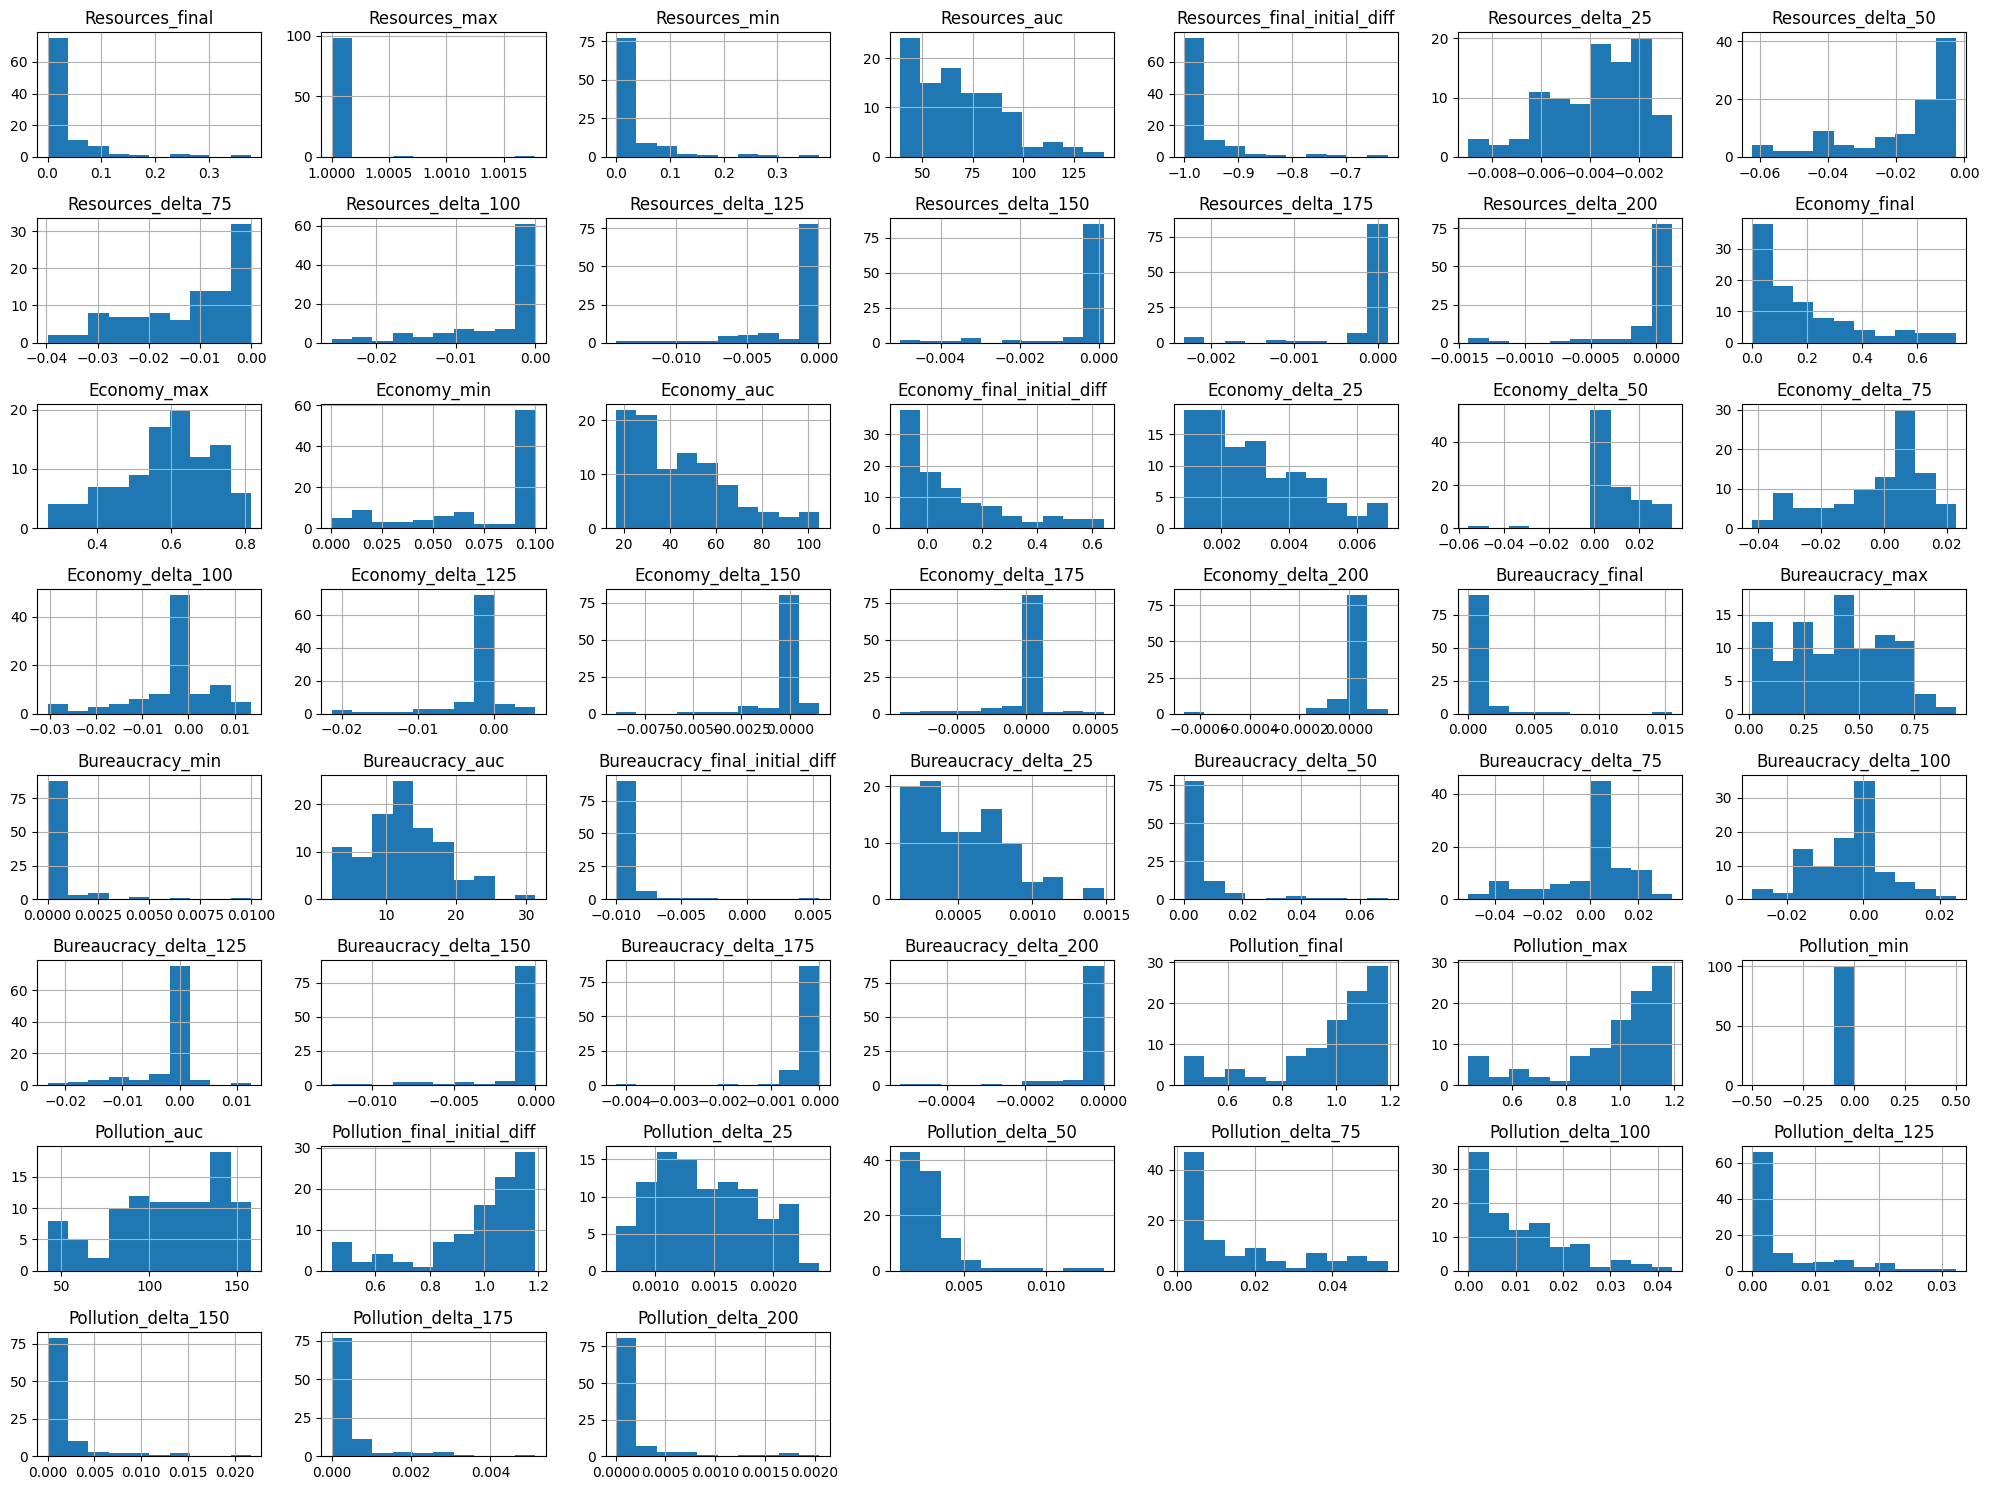

In [205]:
edau.plot_histograms(features_df)

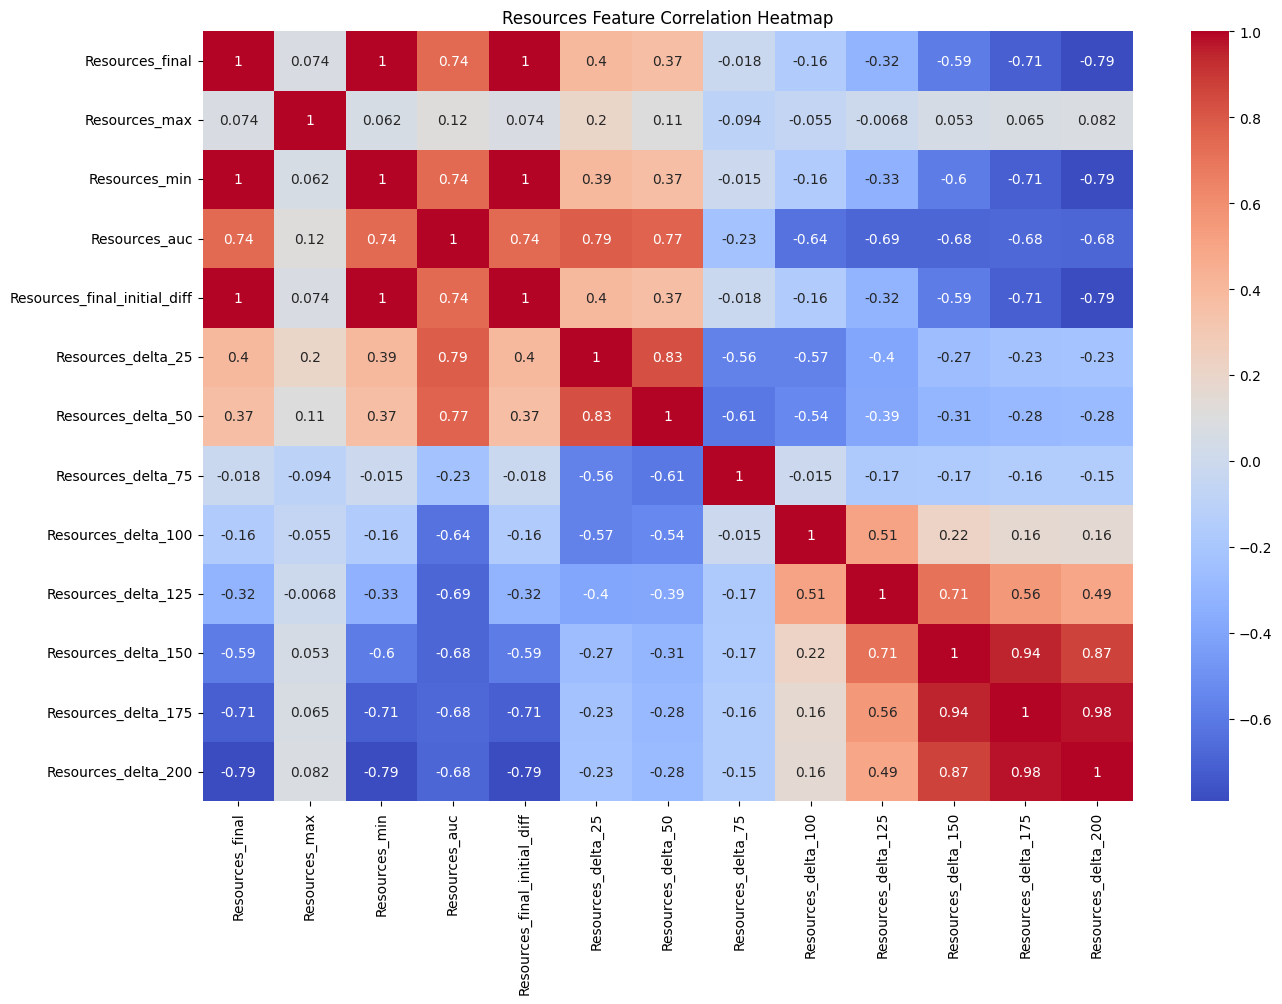

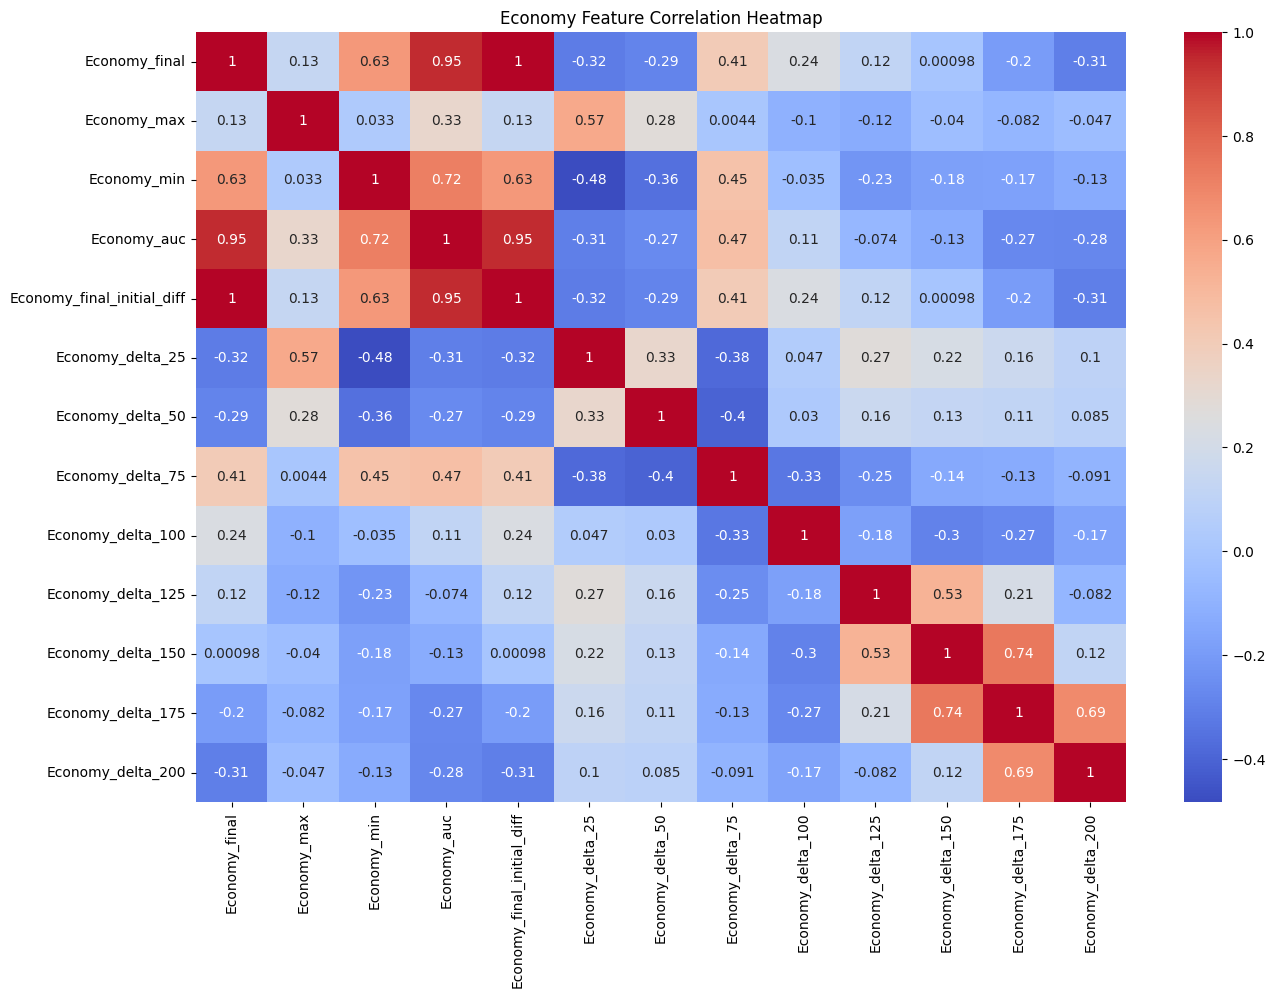

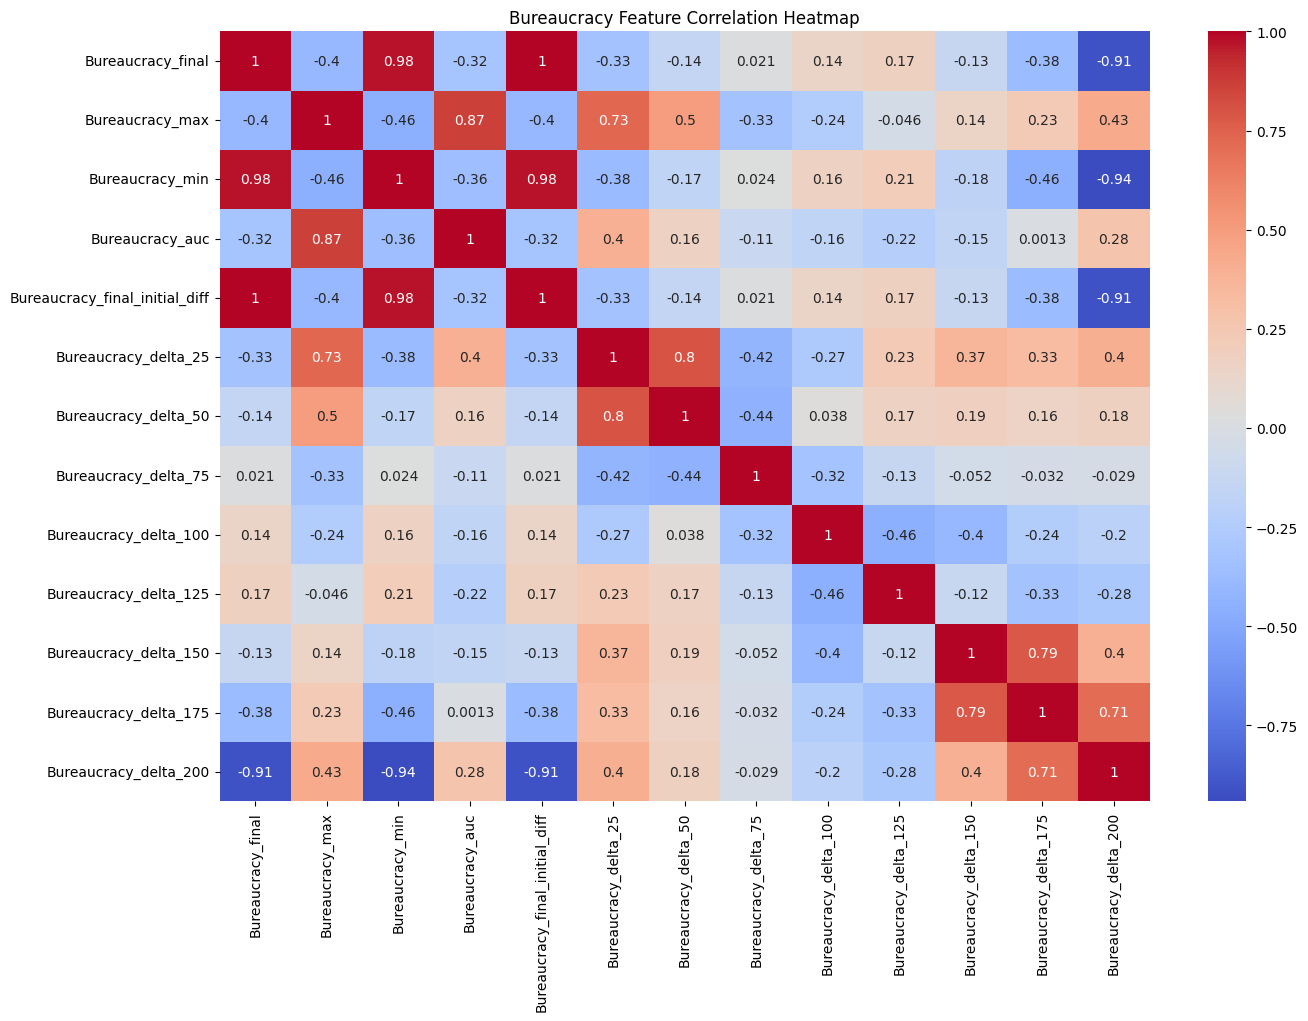

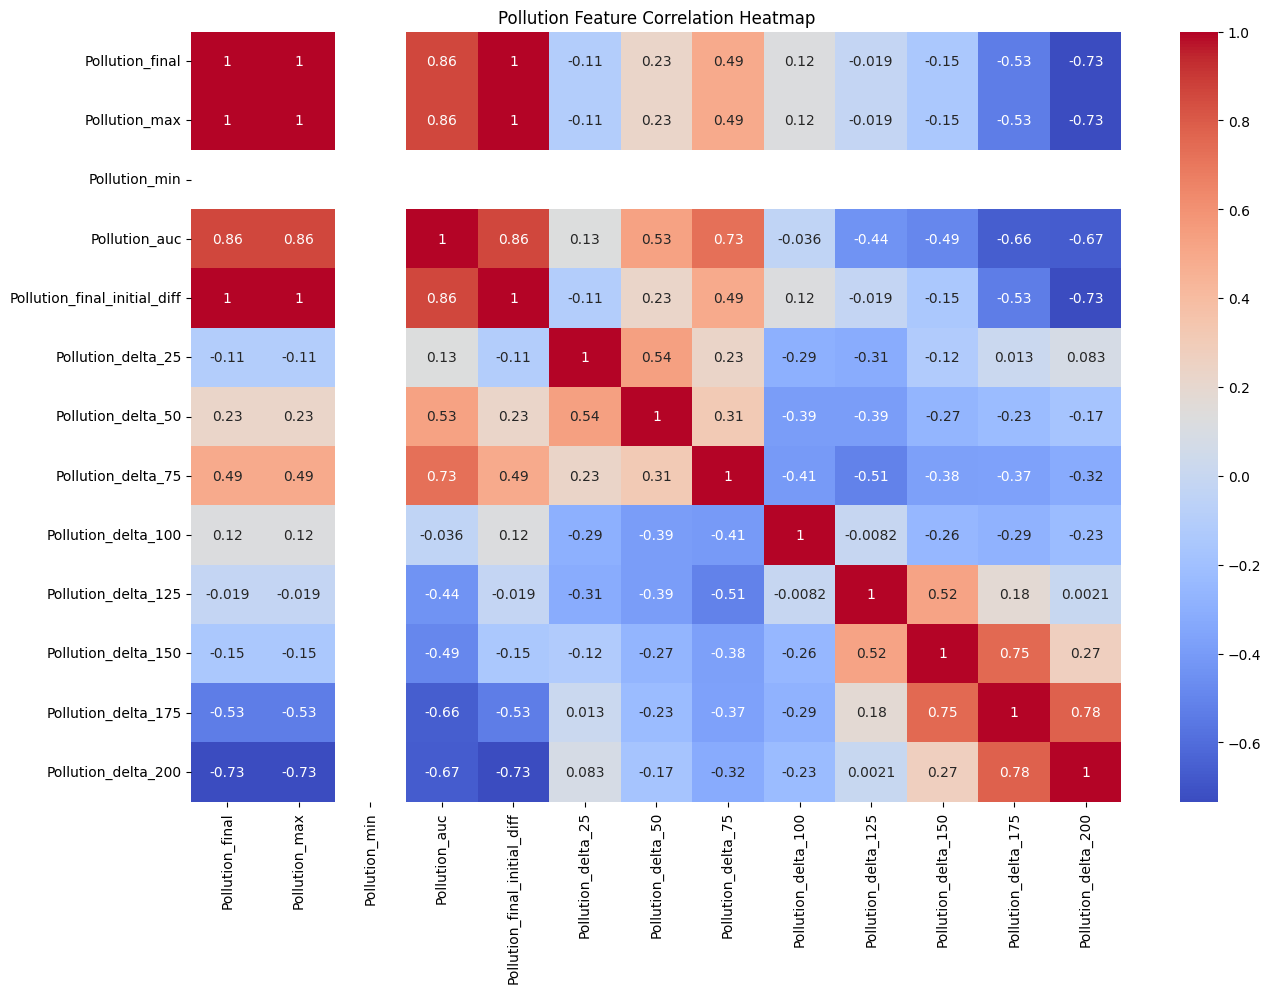

In [206]:
# Correlation heatmap to inspect relationships between features in each stock variable
def plot_corr_heatmap(df, stock_var_name):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{stock_var_name} Feature Correlation Heatmap")
    plt.show()

plot_corr_heatmap(resources_feat_df, "Resources")
plot_corr_heatmap(economy_feat_df, "Economy")
plot_corr_heatmap(bureaucracy_feat_df, "Bureaucracy")
plot_corr_heatmap(pollution_feat_df, "Pollution")

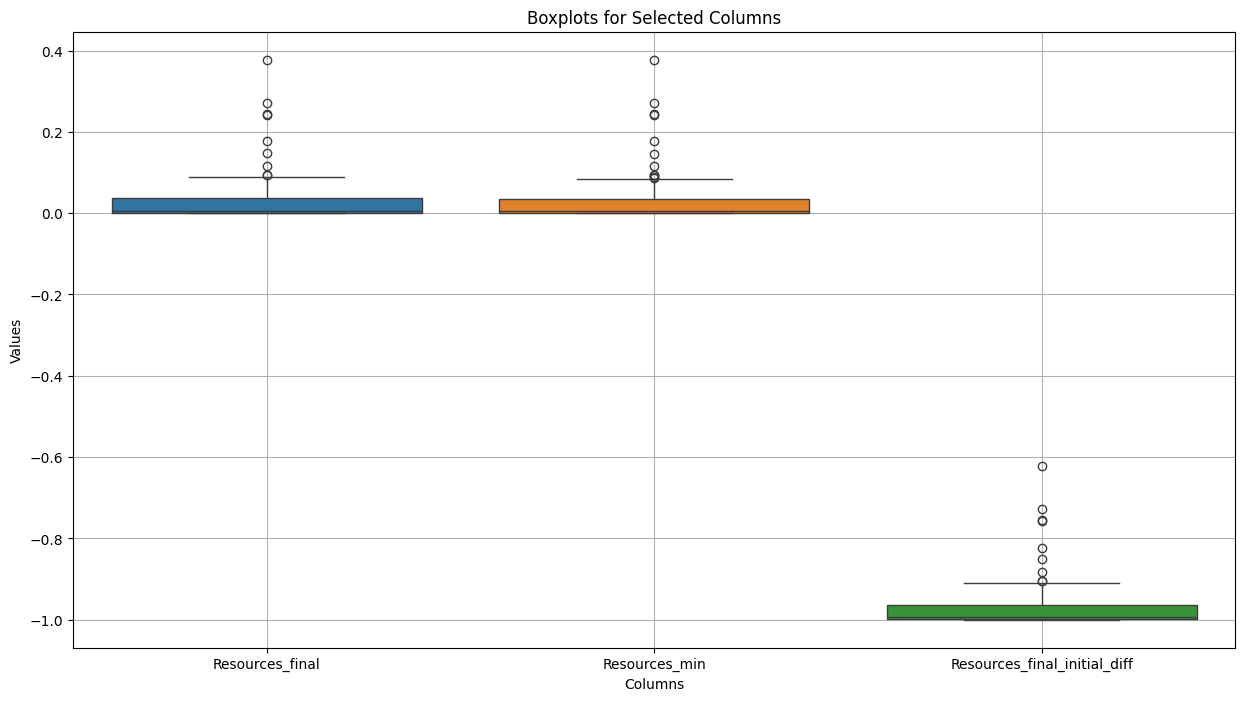

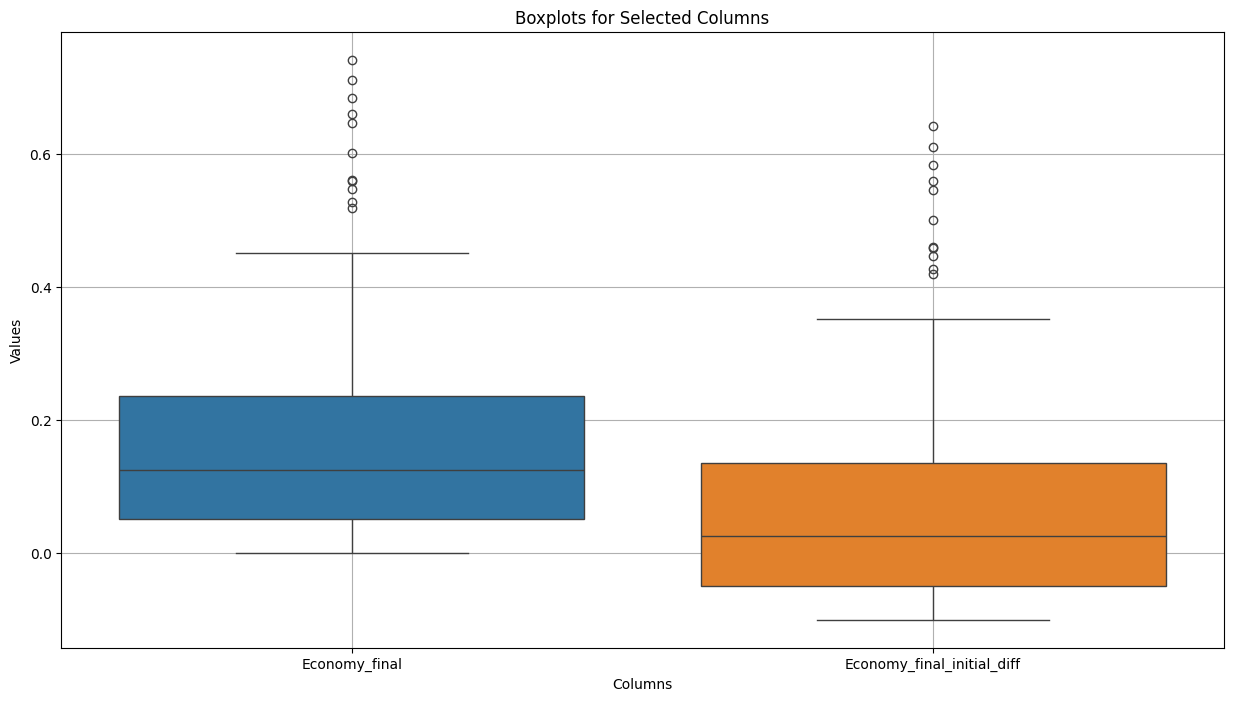

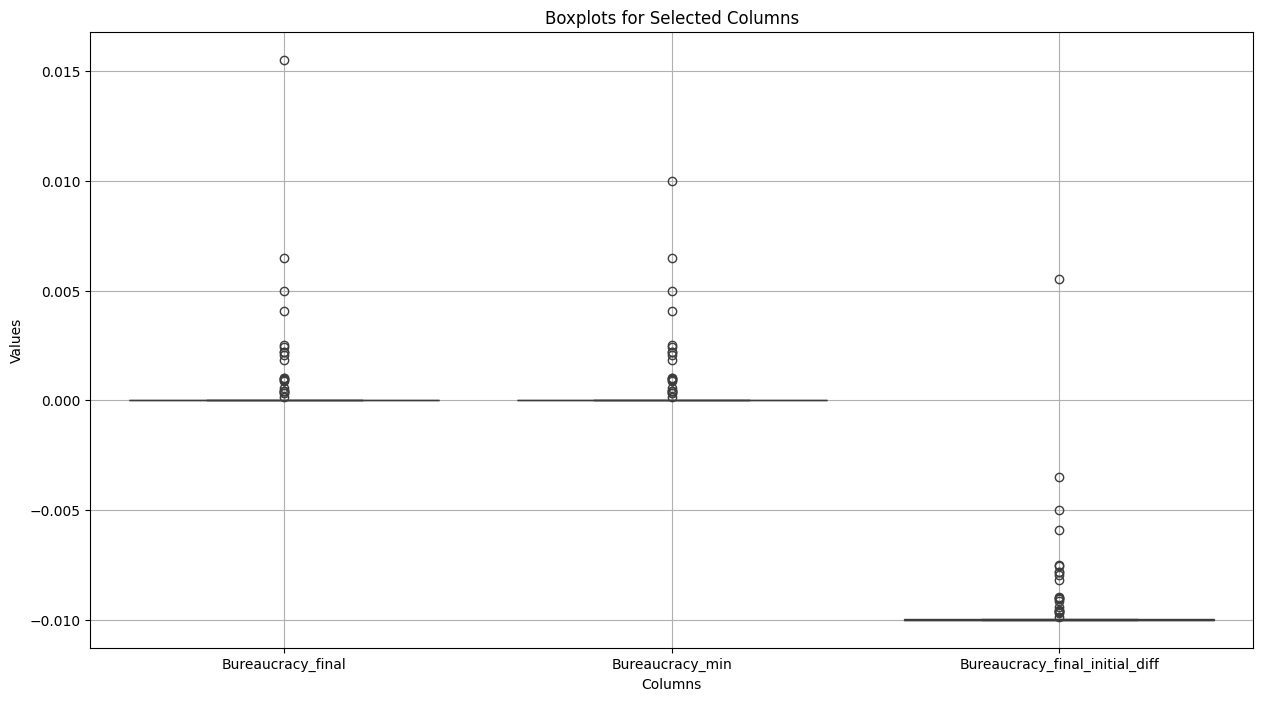

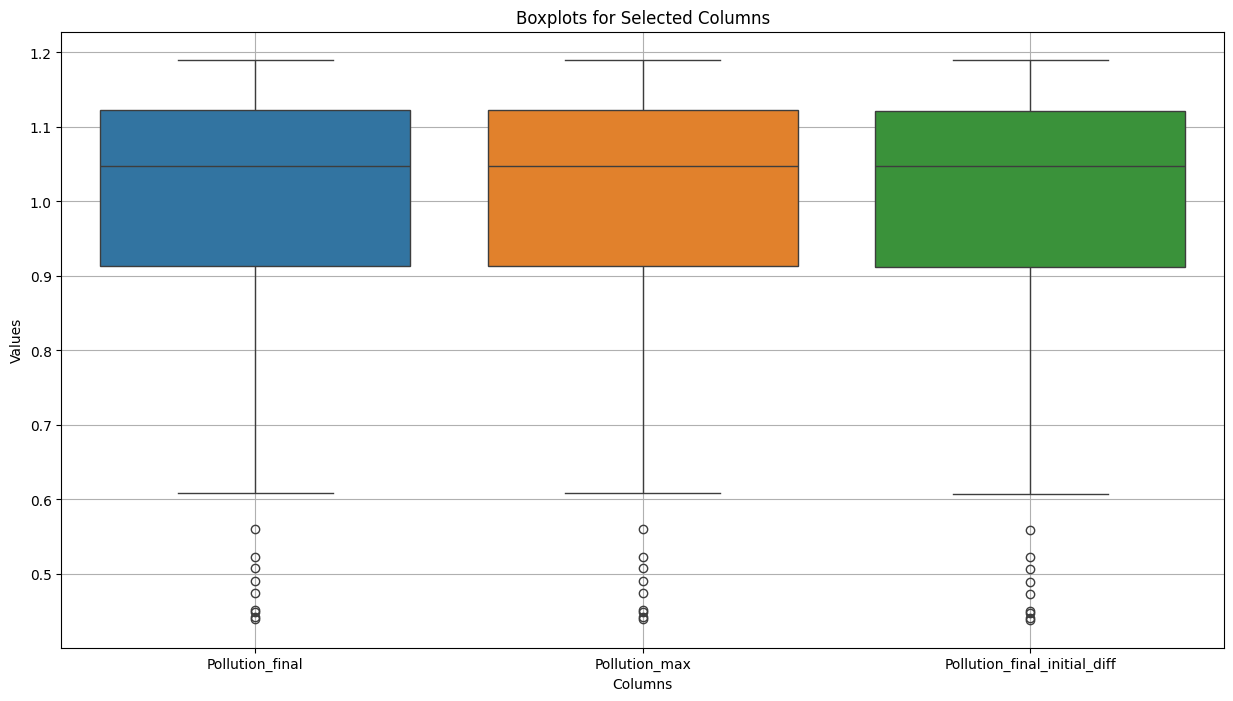

In [207]:
def plot_boxplots(df, columns):
    """
    Plots a single figure with boxplots for the specified columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - columns: list of column names to create boxplots for.
    """
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[columns])
    plt.title("Boxplots for Selected Columns")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()


plot_boxplots(resources_feat_df, ['Resources_final', 'Resources_min', 'Resources_final_initial_diff'])
plot_boxplots(economy_feat_df, ['Economy_final', 'Economy_final_initial_diff'])
plot_boxplots(bureaucracy_feat_df, ['Bureaucracy_final', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff'])
plot_boxplots(pollution_feat_df, ['Pollution_final', 'Pollution_max', 'Pollution_final_initial_diff'])

## Clustering per Stock

### Set up

In [208]:
cp = ClusteringPipeline()

features_to_drop = ['Resources_max', 
                    'Pollution_min', 
                    'Resources_min', 
                    'Resources_final_initial_diff', 
                    'Pollution_max', 
                    'Pollution_final_initial_diff', 
                    'Bureaucracy_min', 
                    'Bureaucracy_final_initial_diff', 
                    'Economy_final_initial_diff']

2025-04-15 13:07:30,439 - INFO - ClusteringPipeline initialized.


### Resources

2025-04-15 13:07:30,460 - INFO - Running data preprocessing.
2025-04-15 13:07:30,461 - INFO - Dropping features: ['Resources_max', 'Pollution_min', 'Resources_min', 'Resources_final_initial_diff', 'Pollution_max', 'Pollution_final_initial_diff', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff', 'Economy_final_initial_diff']
2025-04-15 13:07:30,462 - INFO - Scaling features using StandardScaler.
2025-04-15 13:07:30,466 - INFO - Scaled features shape: (100, 10)
2025-04-15 13:07:30,469 - INFO - Number of components selected: 4
2025-04-15 13:07:30,470 - INFO - New shape after PCA: (100, 4)


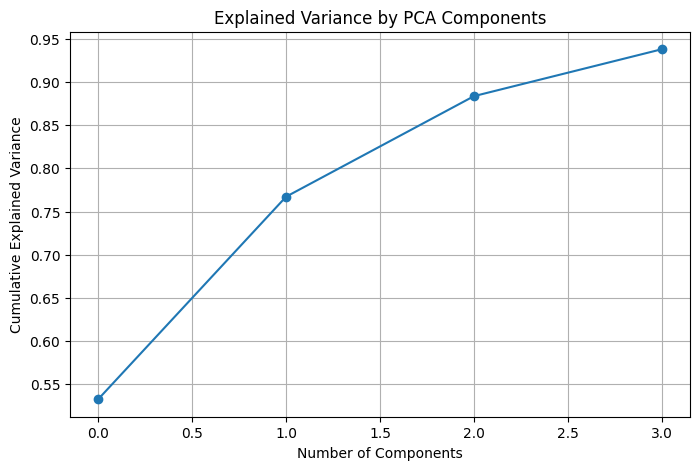

2025-04-15 13:07:30,554 - INFO - Data preprocessing completed.


In [209]:
resources_X = cp.run_data_preprocessing(resources_feat_df, features_to_drop)

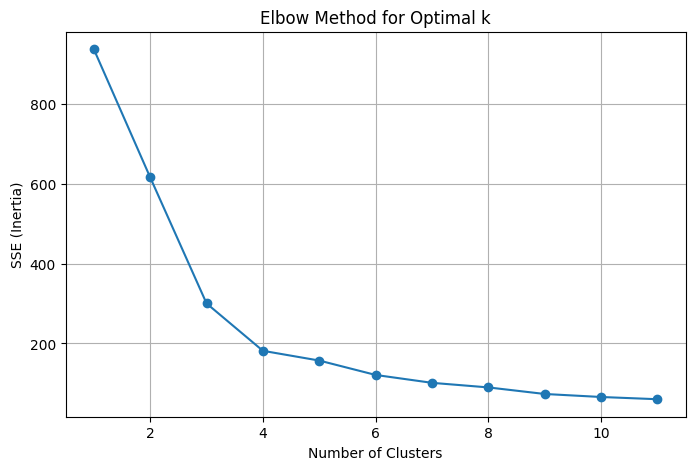

In [210]:
cp.kmeans_elbow_plot(resources_X, range(1, 12))

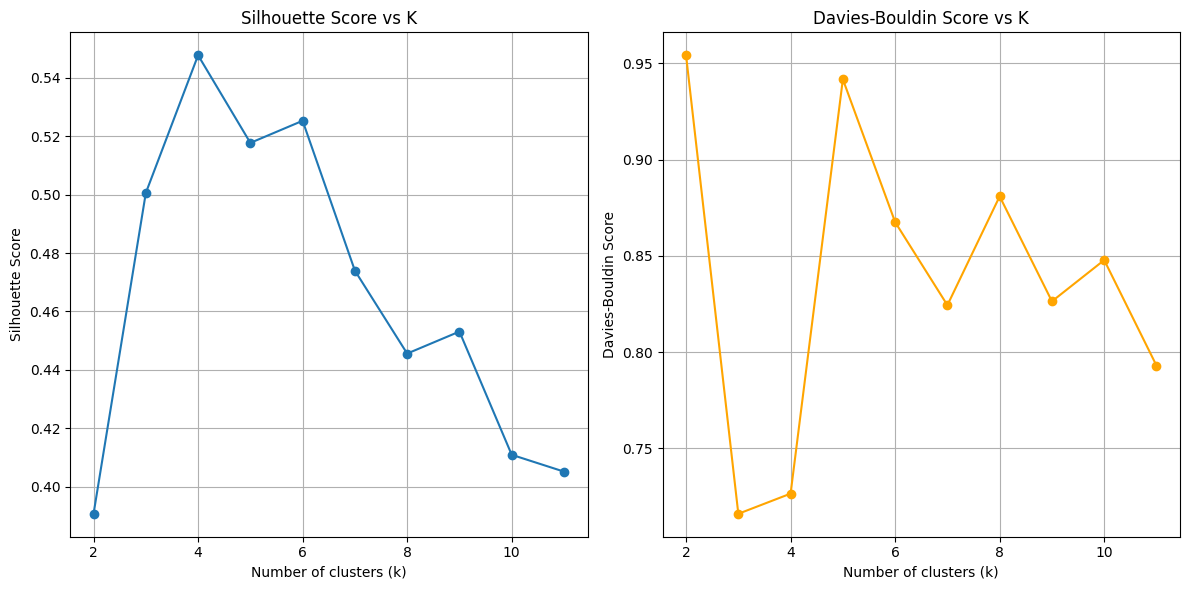

In [211]:
cp.kmeans_clustering_score_plots(resources_X)

In [212]:
resources_kmeans_clusters = cp.kmeans_clustering(resources_X, k=4)

2025-04-15 13:07:31,043 - INFO - Silhouette Score: 0.548
2025-04-15 13:07:31,048 - INFO - Davies-Bouldin Score: 0.727


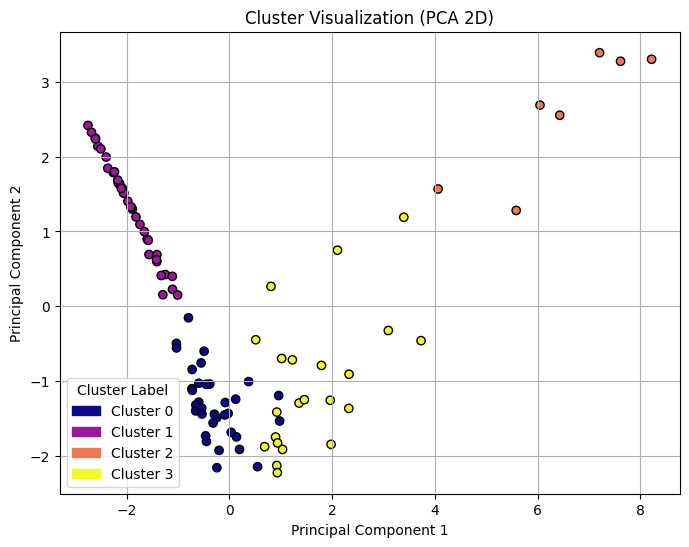

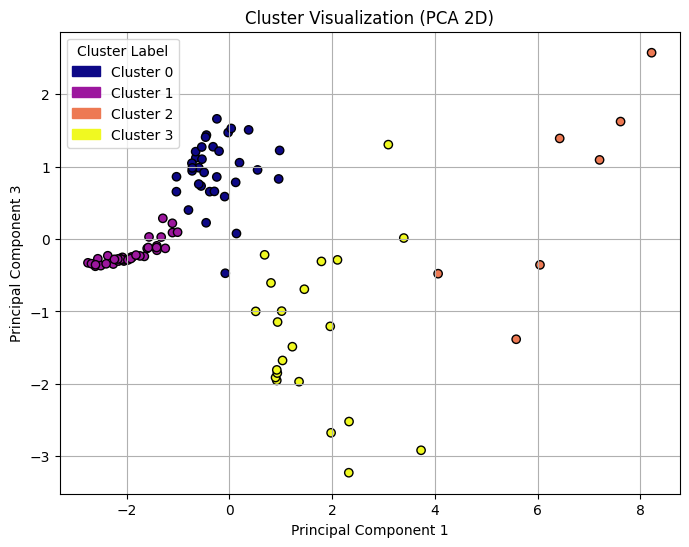

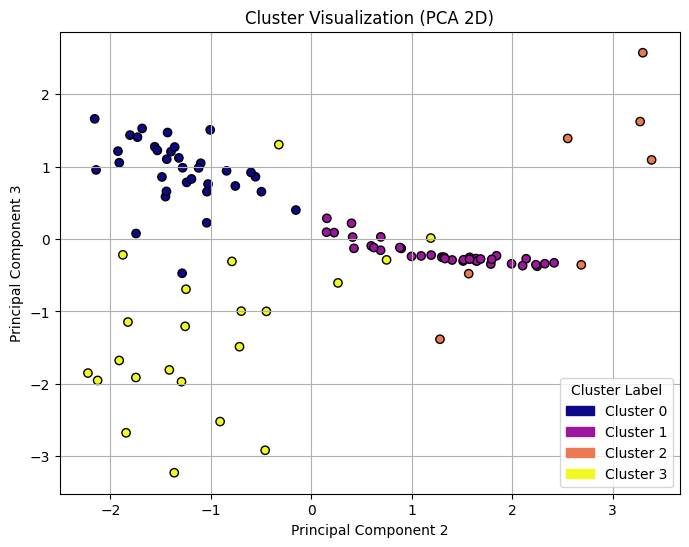

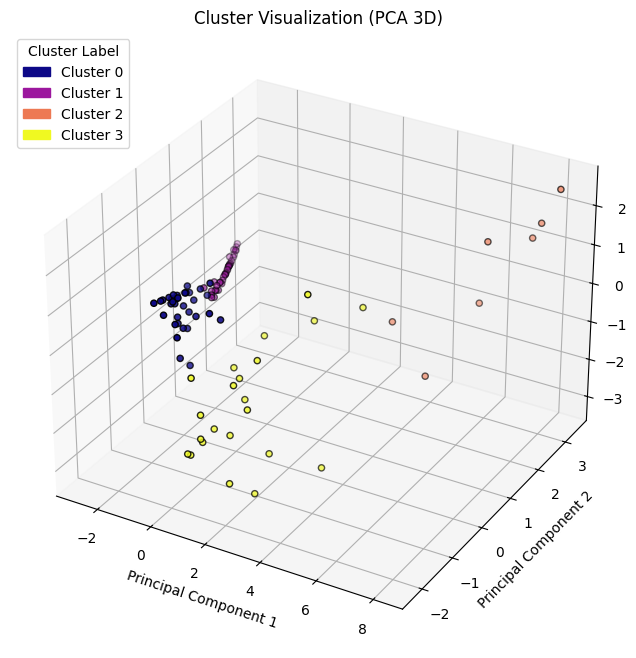

In [213]:
cp.plot_clusters(resources_X, resources_kmeans_clusters, 0, 1)
cp.plot_clusters(resources_X, resources_kmeans_clusters, 0, 2)
cp.plot_clusters(resources_X, resources_kmeans_clusters, 1, 2)
cp.plot_clusters(resources_X, resources_kmeans_clusters, 0, 1, 2)

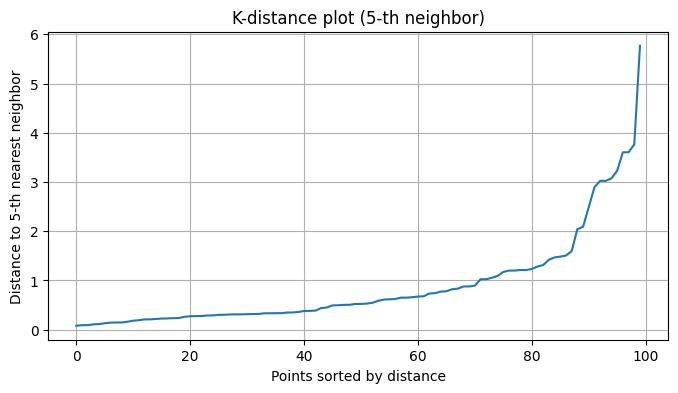

In [214]:
cp.dbscan_elbow_plot(resources_X, n_neighbors=5)

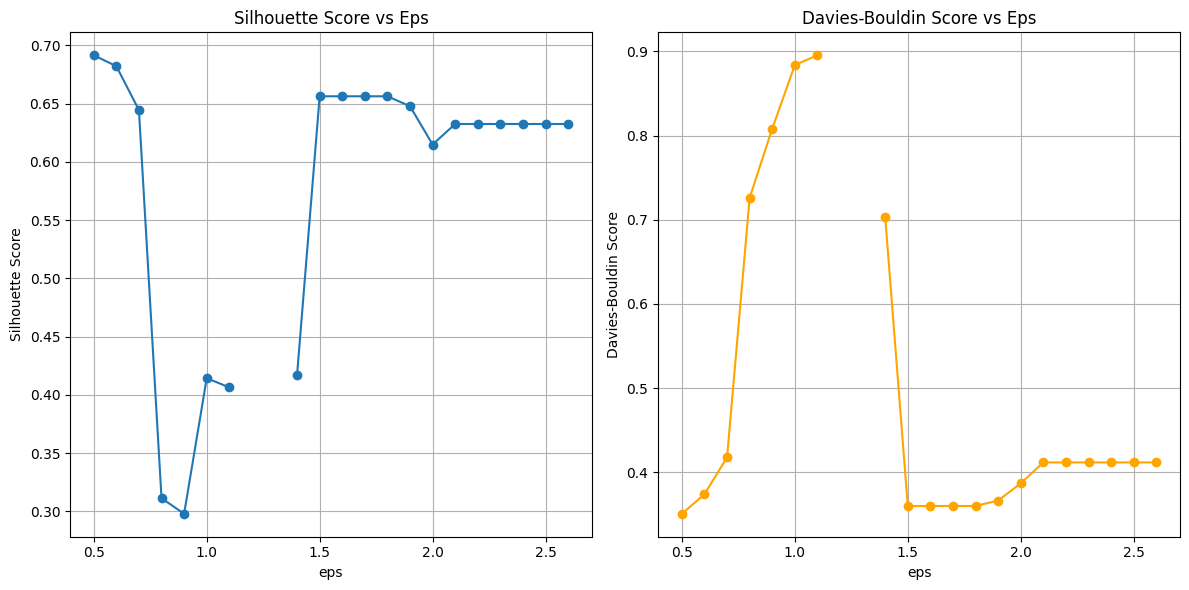

In [215]:
cp.dbscan_clustering_score_plots(resources_X, min_samples=3)

In [216]:
resources_dbscan_clusters = cp.dbscan_clustering(resources_X, eps=0.5, min_samples=3)

2025-04-15 13:07:31,879 - INFO - Running DBSCAN with eps=0.5, min_samples=3.
2025-04-15 13:07:31,882 - INFO - DBSCAN found 3 clusters and 34 noise points.


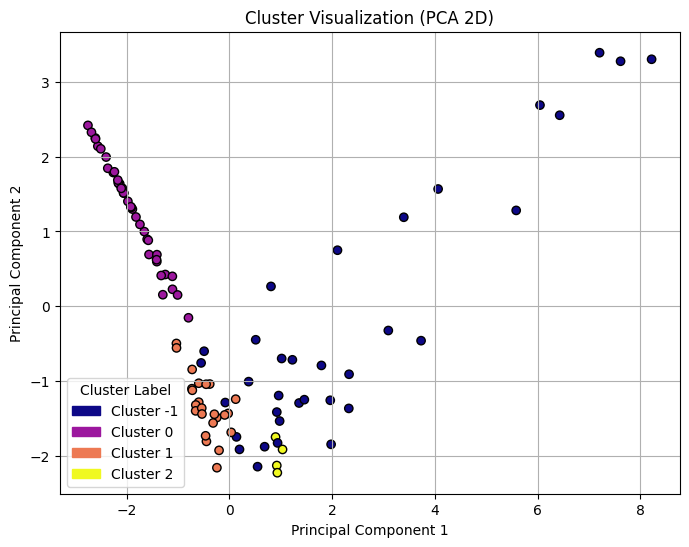

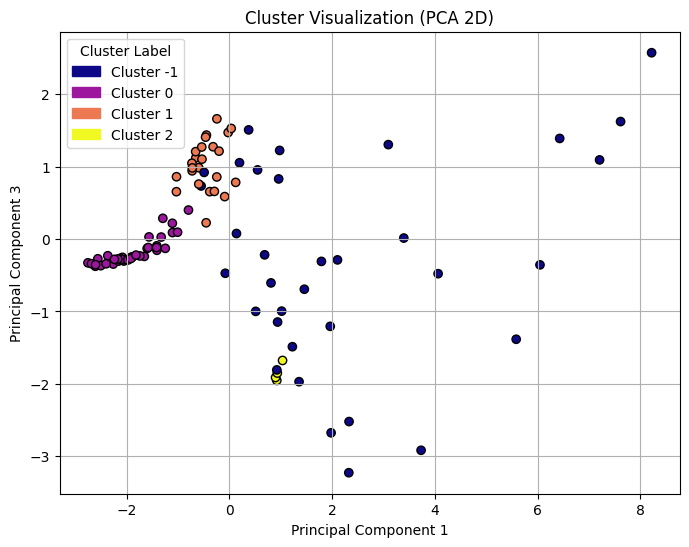

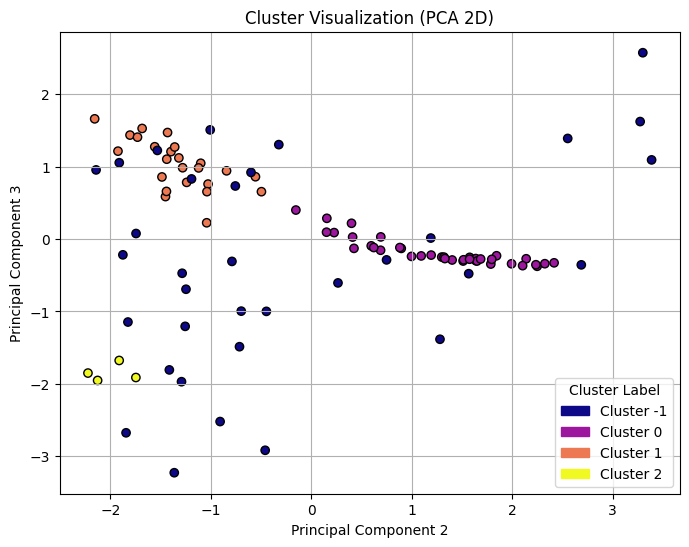

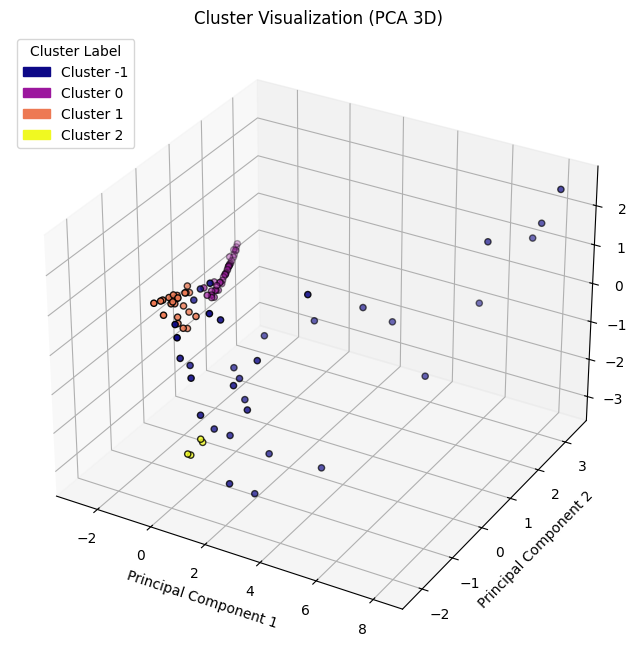

In [217]:
cp.plot_clusters(resources_X, resources_dbscan_clusters, 0, 1)
cp.plot_clusters(resources_X, resources_dbscan_clusters, 0, 2)
cp.plot_clusters(resources_X, resources_dbscan_clusters, 1, 2)
cp.plot_clusters(resources_X, resources_dbscan_clusters, 0, 1, 2)

### Economy

2025-04-15 13:07:32,278 - INFO - Running data preprocessing.
2025-04-15 13:07:32,280 - INFO - Dropping features: ['Resources_max', 'Pollution_min', 'Resources_min', 'Resources_final_initial_diff', 'Pollution_max', 'Pollution_final_initial_diff', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff', 'Economy_final_initial_diff']
2025-04-15 13:07:32,283 - INFO - Scaling features using StandardScaler.


2025-04-15 13:07:32,286 - INFO - Scaled features shape: (100, 12)
2025-04-15 13:07:32,292 - INFO - Number of components selected: 7
2025-04-15 13:07:32,293 - INFO - New shape after PCA: (100, 7)


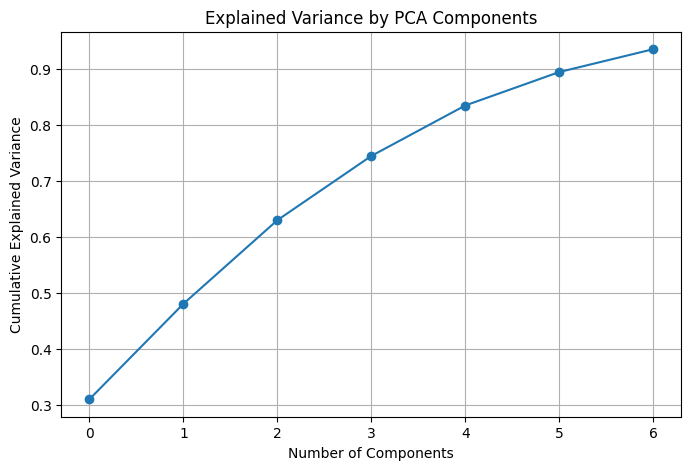

2025-04-15 13:07:32,371 - INFO - Data preprocessing completed.


In [218]:
economy_X = cp.run_data_preprocessing(economy_feat_df, features_to_drop)

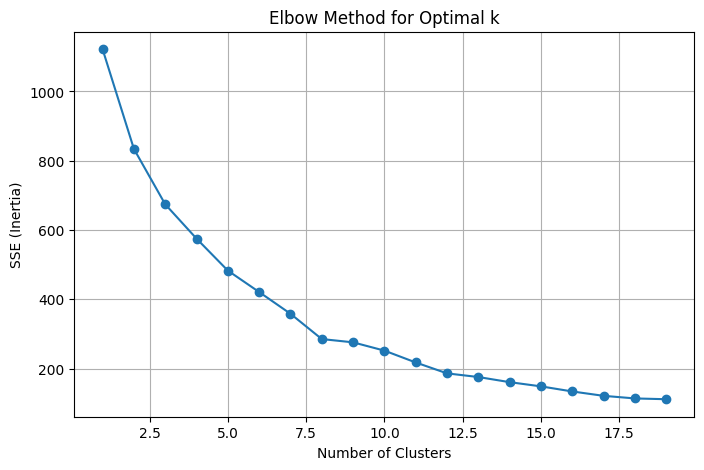

In [219]:
cp.kmeans_elbow_plot(economy_X, range(1, 20))

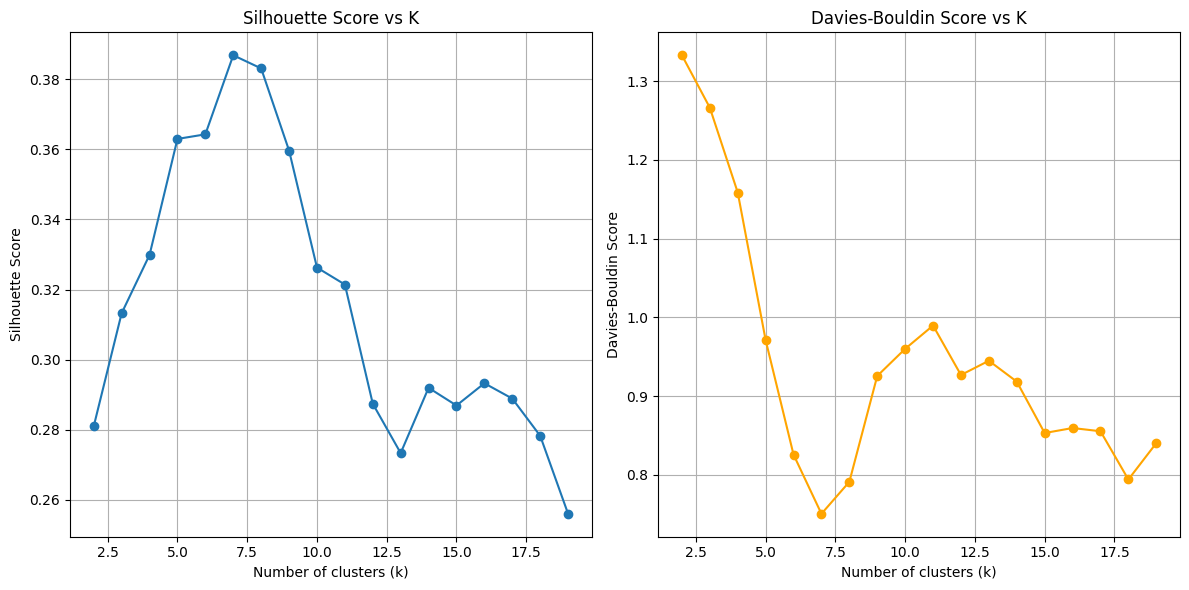

In [220]:
cp.kmeans_clustering_score_plots(economy_X, range(2, 20))

In [221]:
economy_kmeans_clusters = cp.kmeans_clustering(economy_X, k=7)

2025-04-15 13:07:32,796 - INFO - Silhouette Score: 0.387
2025-04-15 13:07:32,800 - INFO - Davies-Bouldin Score: 0.751


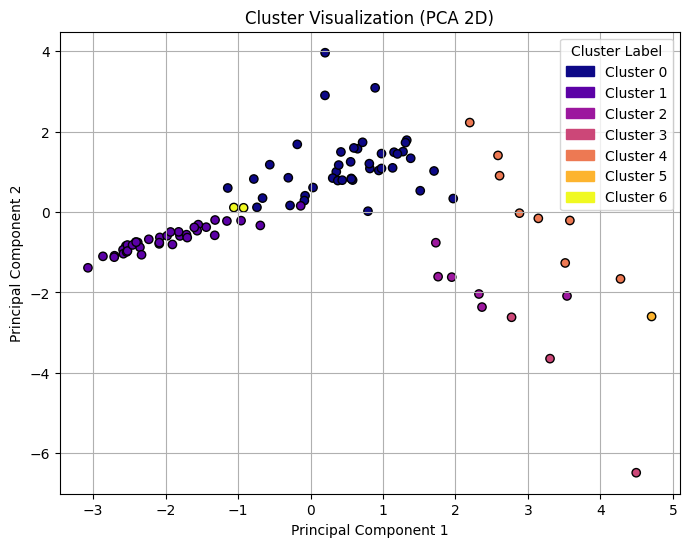

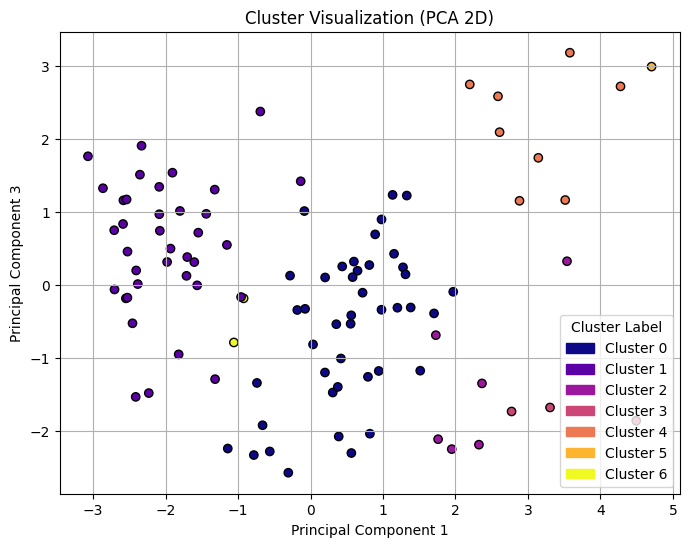

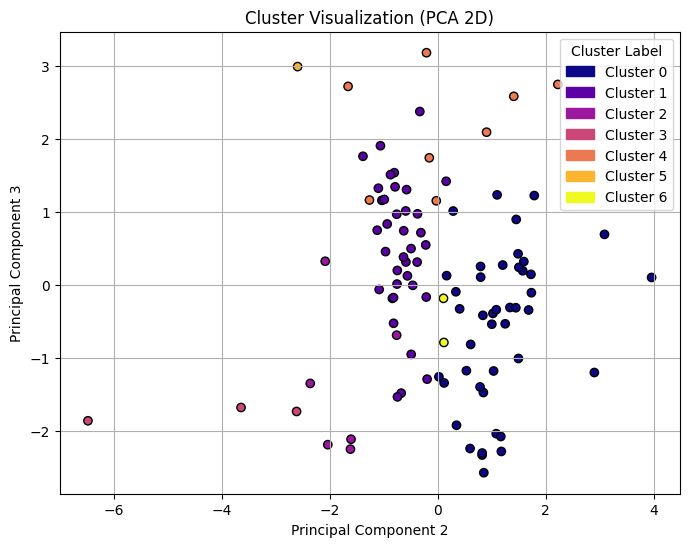

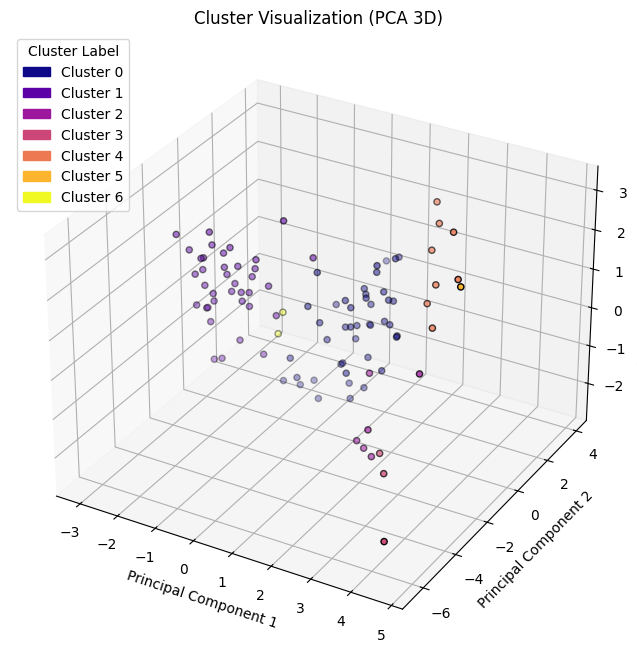

In [222]:
cp.plot_clusters(economy_X, economy_kmeans_clusters, 0, 1)
cp.plot_clusters(economy_X, economy_kmeans_clusters, 0, 2)
cp.plot_clusters(economy_X, economy_kmeans_clusters, 1, 2)
cp.plot_clusters(economy_X, economy_kmeans_clusters, 0, 1, 2)

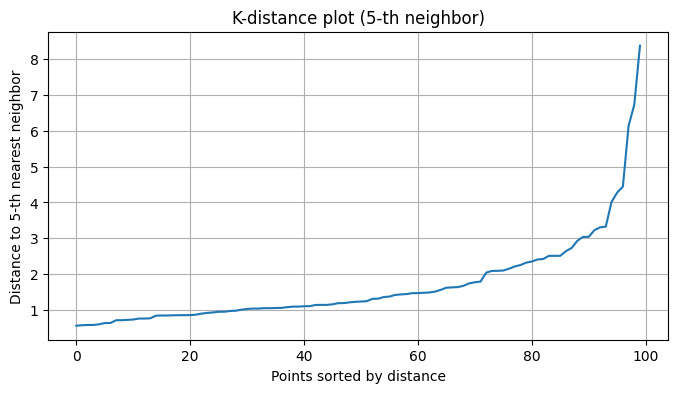

In [223]:
cp.dbscan_elbow_plot(economy_X, n_neighbors=5)

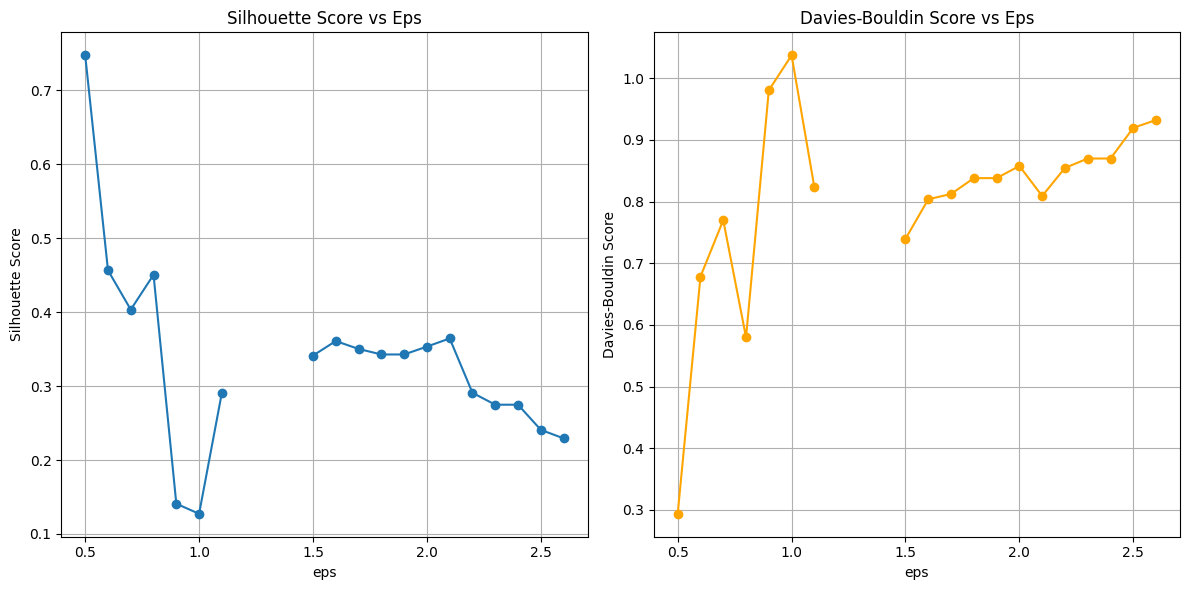

In [224]:
cp.dbscan_clustering_score_plots(economy_X, min_samples=3)

In [225]:
economy_dbscan_clusters = cp.dbscan_clustering(economy_X, eps=0.5, min_samples=3)

2025-04-15 13:07:33,864 - INFO - Running DBSCAN with eps=0.5, min_samples=3.


2025-04-15 13:07:33,870 - INFO - DBSCAN found 4 clusters and 87 noise points.


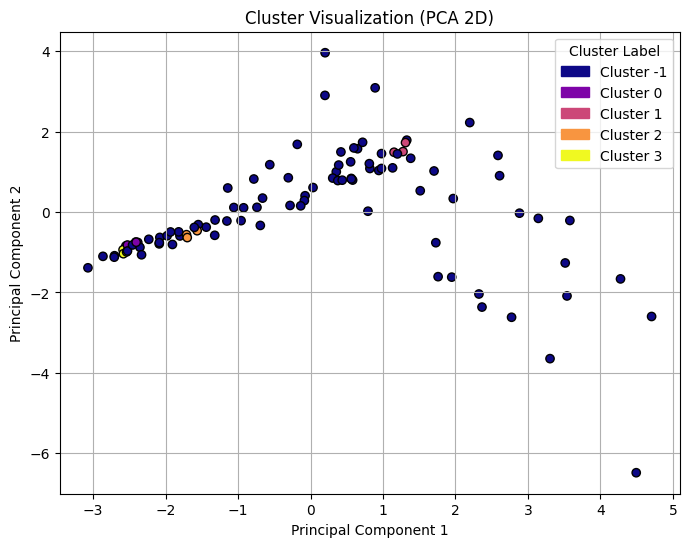

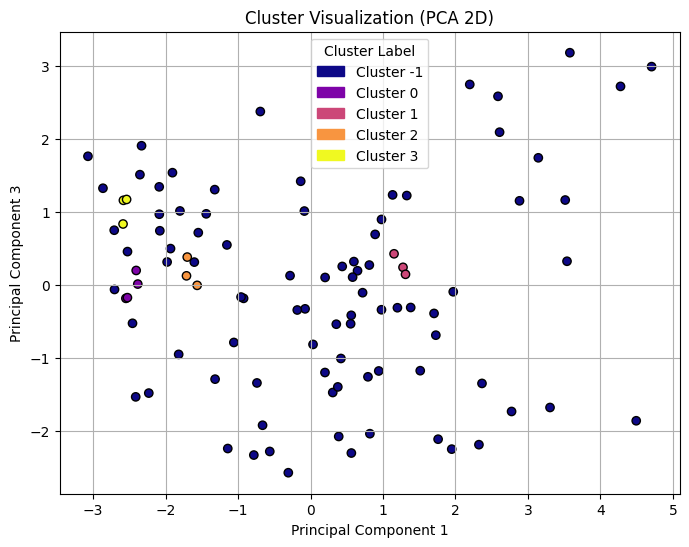

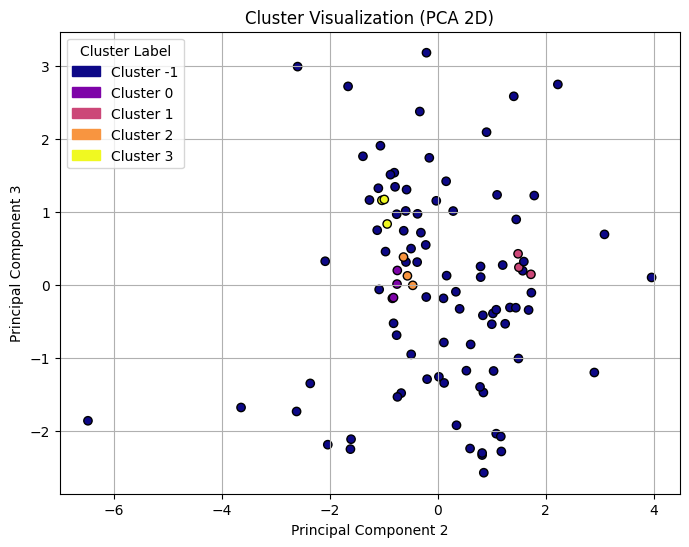

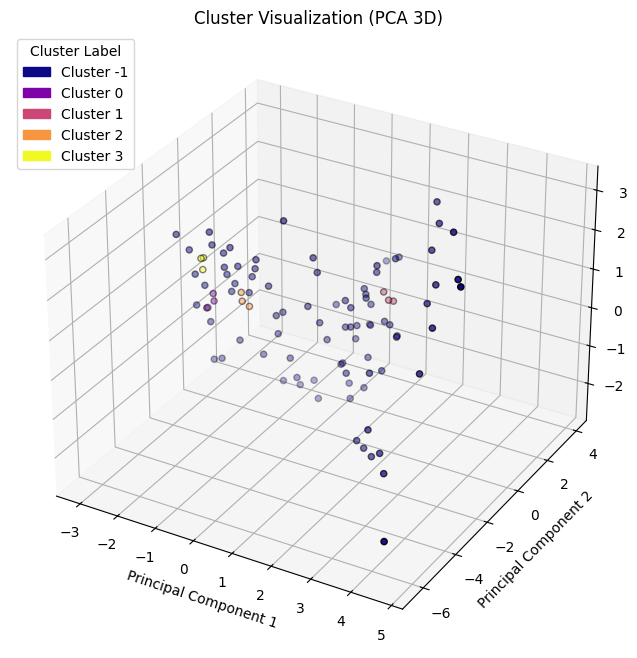

In [226]:
cp.plot_clusters(economy_X, economy_dbscan_clusters, 0, 1)
cp.plot_clusters(economy_X, economy_dbscan_clusters, 0, 2)
cp.plot_clusters(economy_X, economy_dbscan_clusters, 1, 2)
cp.plot_clusters(economy_X, economy_dbscan_clusters, 0, 1, 2)

### Bureaucracy

2025-04-15 13:07:34,310 - INFO - Running data preprocessing.
2025-04-15 13:07:34,312 - INFO - Dropping features: ['Resources_max', 'Pollution_min', 'Resources_min', 'Resources_final_initial_diff', 'Pollution_max', 'Pollution_final_initial_diff', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff', 'Economy_final_initial_diff']
2025-04-15 13:07:34,316 - INFO - Scaling features using StandardScaler.
2025-04-15 13:07:34,320 - INFO - Scaled features shape: (100, 11)
2025-04-15 13:07:34,322 - INFO - Number of components selected: 5
2025-04-15 13:07:34,324 - INFO - New shape after PCA: (100, 5)


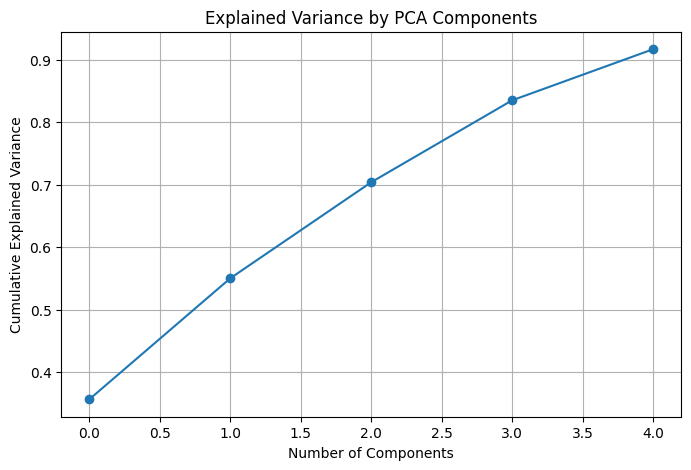

2025-04-15 13:07:34,405 - INFO - Data preprocessing completed.


In [227]:
bureaucracy_X = cp.run_data_preprocessing(bureaucracy_feat_df, features_to_drop)

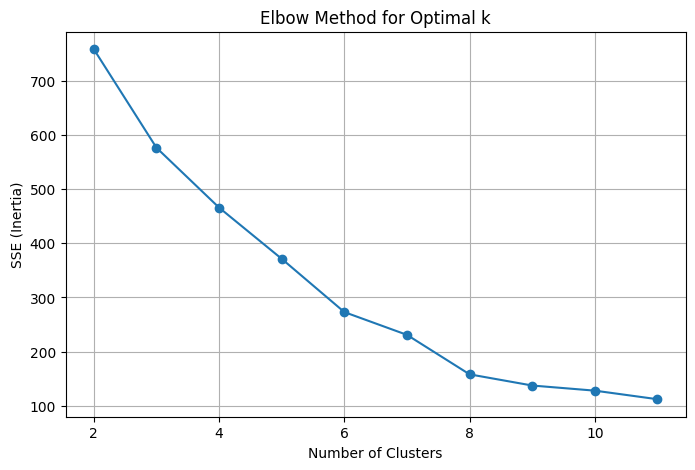

In [228]:
cp.kmeans_elbow_plot(bureaucracy_X)

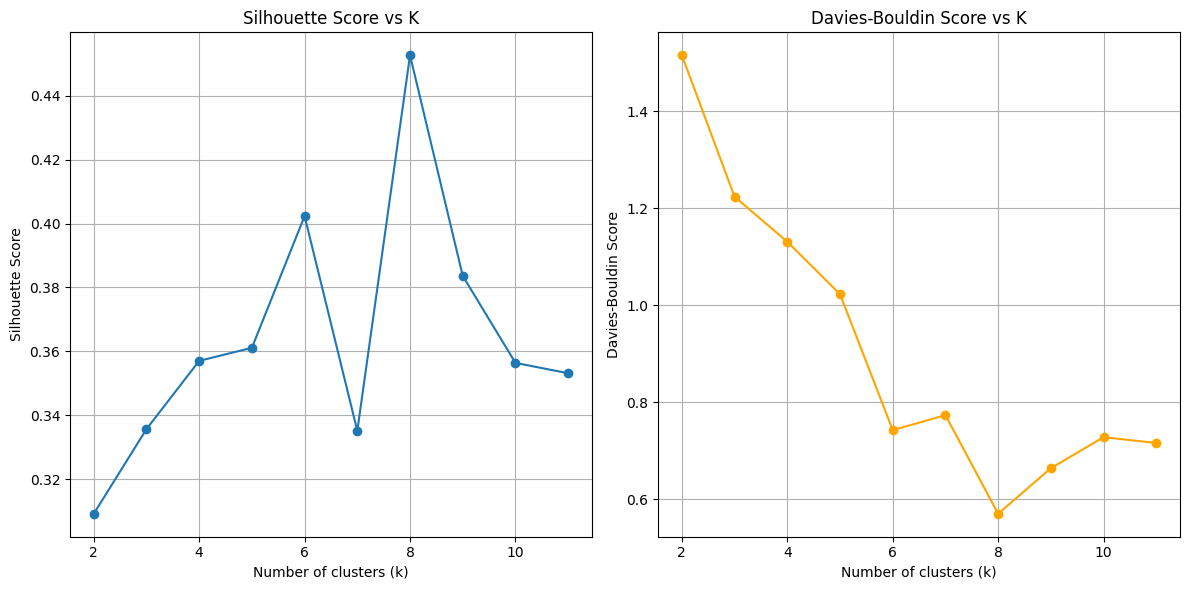

In [229]:
cp.kmeans_clustering_score_plots(bureaucracy_X)

In [230]:
bureaucracy_kmeans_clusters = cp.kmeans_clustering(bureaucracy_X, k=8)

2025-04-15 13:07:34,748 - INFO - Silhouette Score: 0.453
2025-04-15 13:07:34,753 - INFO - Davies-Bouldin Score: 0.570


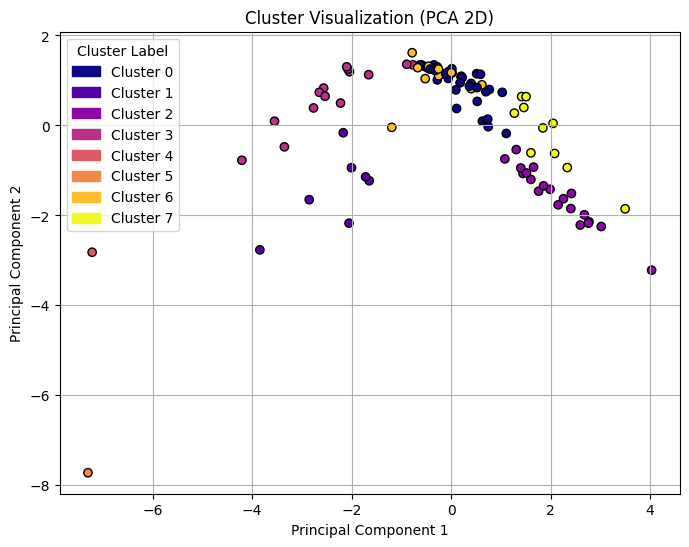

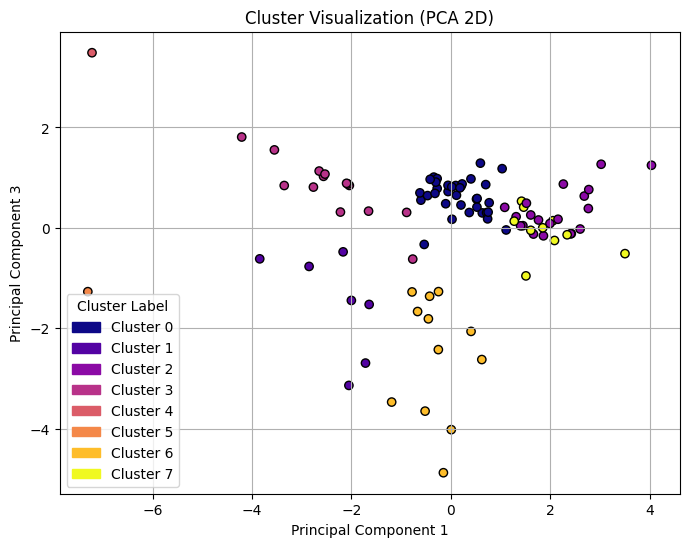

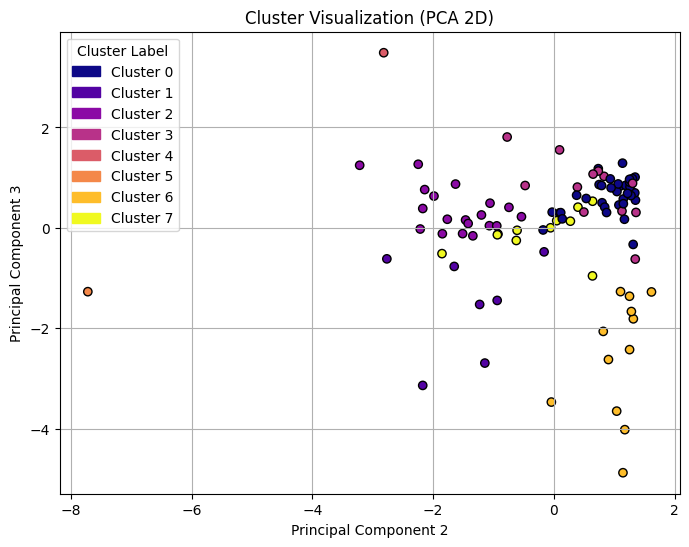

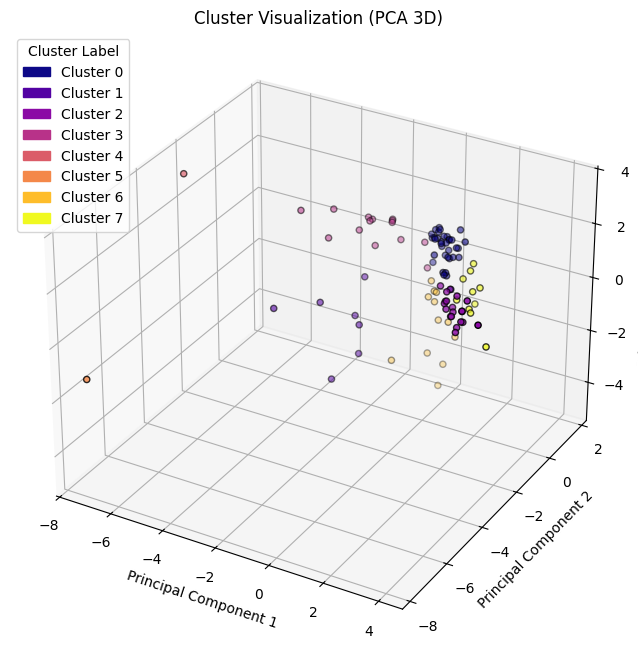

In [231]:
cp.plot_clusters(bureaucracy_X, bureaucracy_kmeans_clusters, 0, 1)
cp.plot_clusters(bureaucracy_X, bureaucracy_kmeans_clusters, 0, 2)
cp.plot_clusters(bureaucracy_X, bureaucracy_kmeans_clusters, 1, 2)
cp.plot_clusters(bureaucracy_X, bureaucracy_kmeans_clusters, 0, 1, 2)

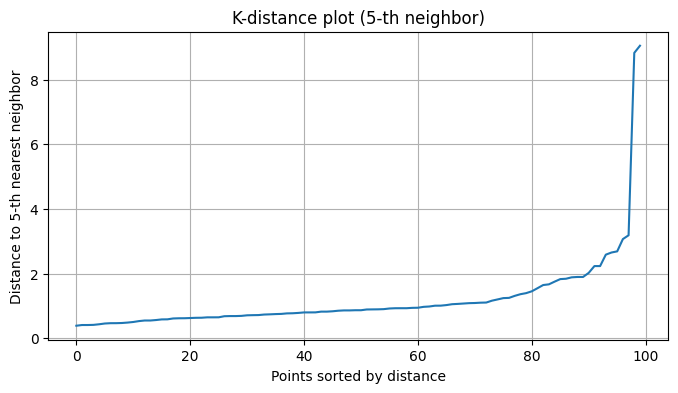

In [232]:
cp.dbscan_elbow_plot(bureaucracy_X, n_neighbors=5)

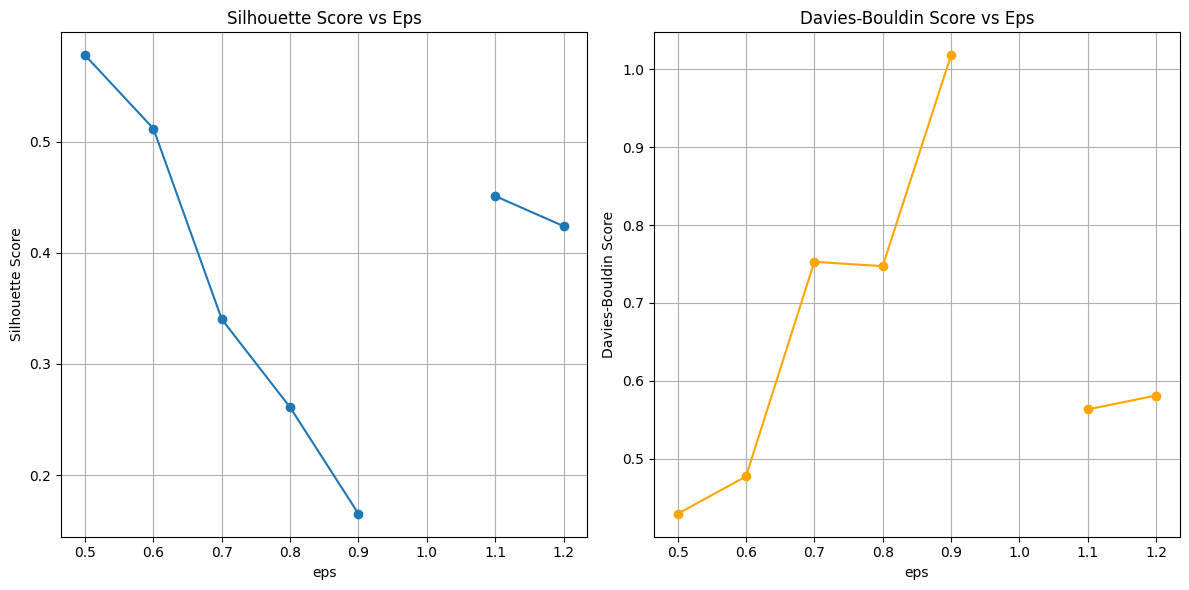

In [233]:
cp.dbscan_clustering_score_plots(bureaucracy_X, min_samples=3)

In [234]:
bureaucracy_dbscan_clusters = cp.dbscan_clustering(bureaucracy_X, eps=0.5, min_samples=3)

2025-04-15 13:07:35,620 - INFO - Running DBSCAN with eps=0.5, min_samples=3.
2025-04-15 13:07:35,623 - INFO - DBSCAN found 7 clusters and 54 noise points.


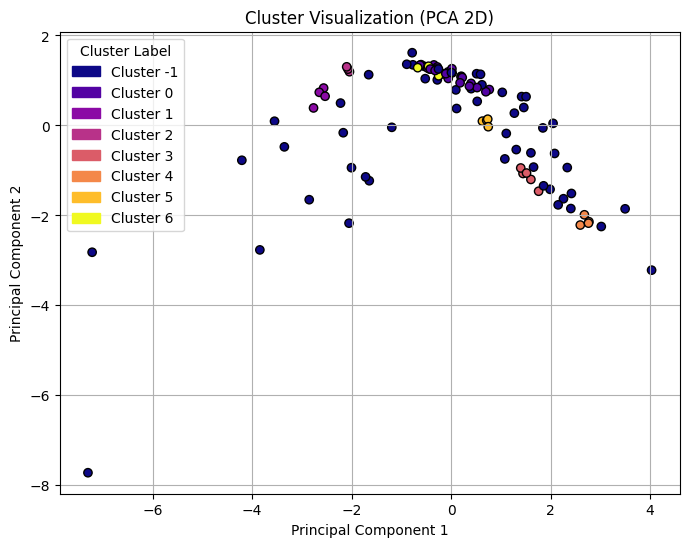

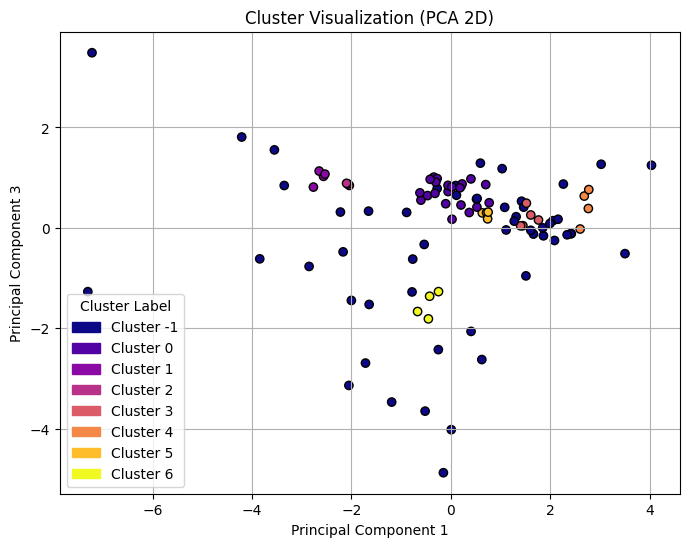

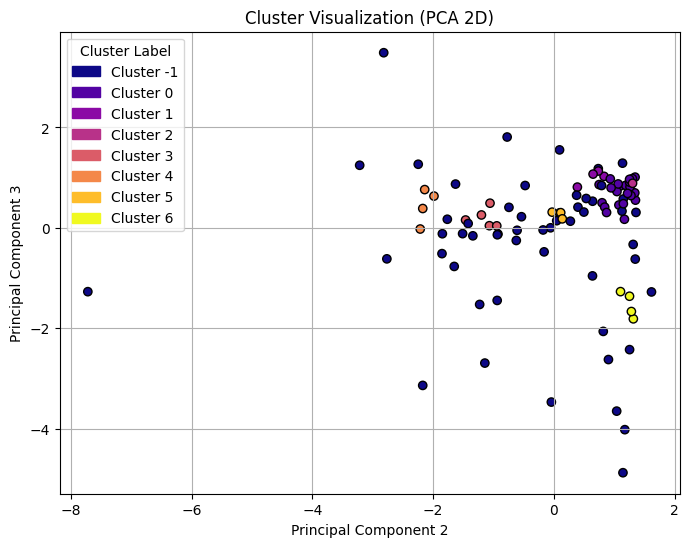

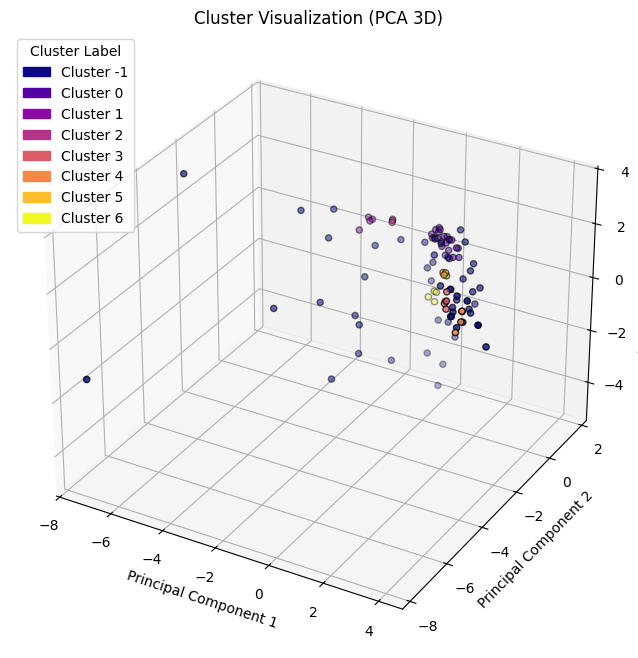

In [235]:
cp.plot_clusters(bureaucracy_X, bureaucracy_dbscan_clusters, 0, 1)
cp.plot_clusters(bureaucracy_X, bureaucracy_dbscan_clusters, 0, 2)
cp.plot_clusters(bureaucracy_X, bureaucracy_dbscan_clusters, 1, 2)
cp.plot_clusters(bureaucracy_X, bureaucracy_dbscan_clusters, 0, 1, 2)

### Pollution

2025-04-15 13:07:36,061 - INFO - Running data preprocessing.
2025-04-15 13:07:36,062 - INFO - Dropping features: ['Resources_max', 'Pollution_min', 'Resources_min', 'Resources_final_initial_diff', 'Pollution_max', 'Pollution_final_initial_diff', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff', 'Economy_final_initial_diff']
2025-04-15 13:07:36,063 - INFO - Scaling features using StandardScaler.
2025-04-15 13:07:36,066 - INFO - Scaled features shape: (100, 10)
2025-04-15 13:07:36,068 - INFO - Number of components selected: 5
2025-04-15 13:07:36,069 - INFO - New shape after PCA: (100, 5)


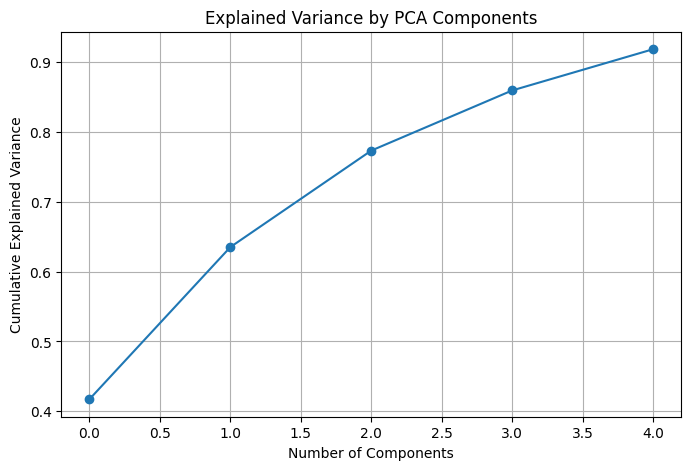

2025-04-15 13:07:36,179 - INFO - Data preprocessing completed.


In [236]:
pollution_X = cp.run_data_preprocessing(pollution_feat_df, features_to_drop)

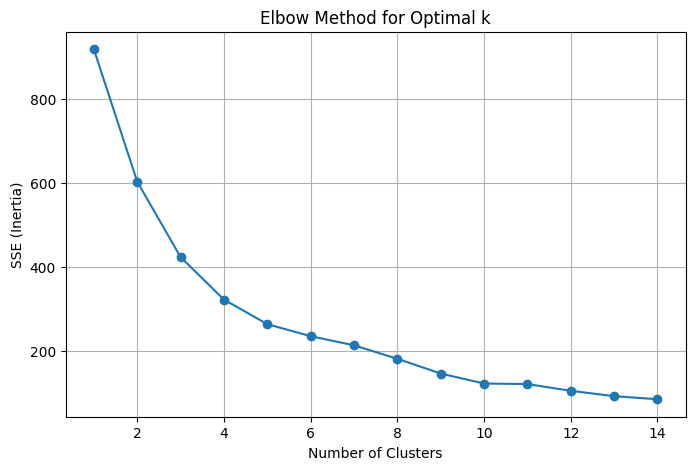

In [237]:
cp.kmeans_elbow_plot(pollution_X, range(1, 15))

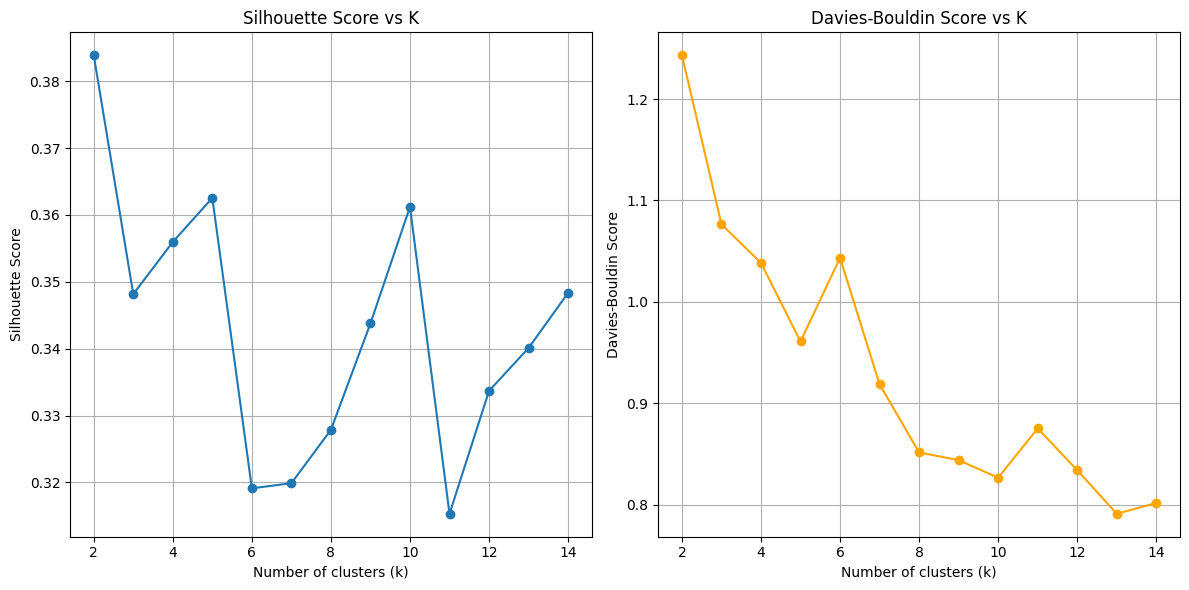

In [238]:
cp.kmeans_clustering_score_plots(pollution_X, range(2, 15))

In [239]:
pollution_kmeans_clusters = cp.kmeans_clustering(pollution_X, k=10)

2025-04-15 13:07:36,546 - INFO - Silhouette Score: 0.361
2025-04-15 13:07:36,551 - INFO - Davies-Bouldin Score: 0.827


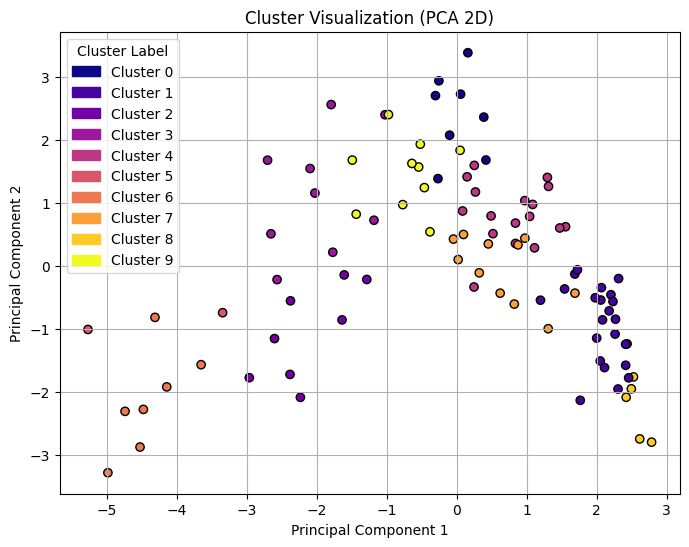

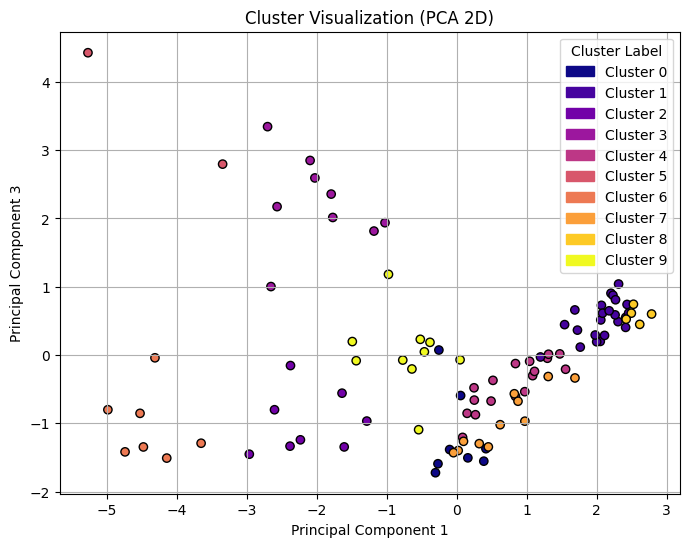

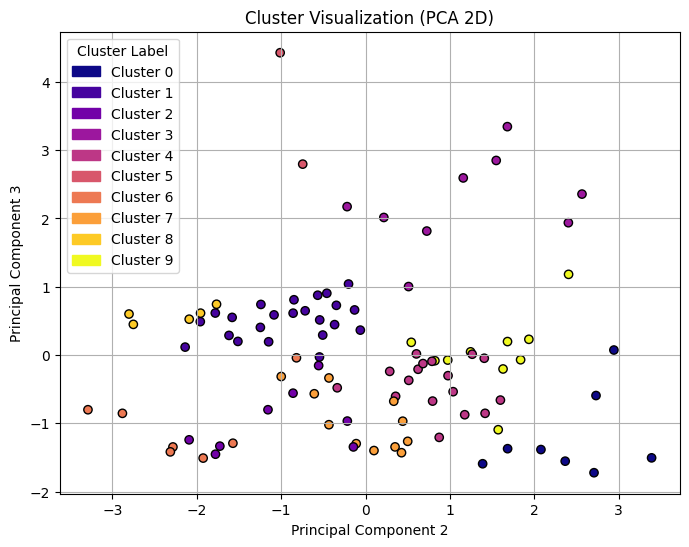

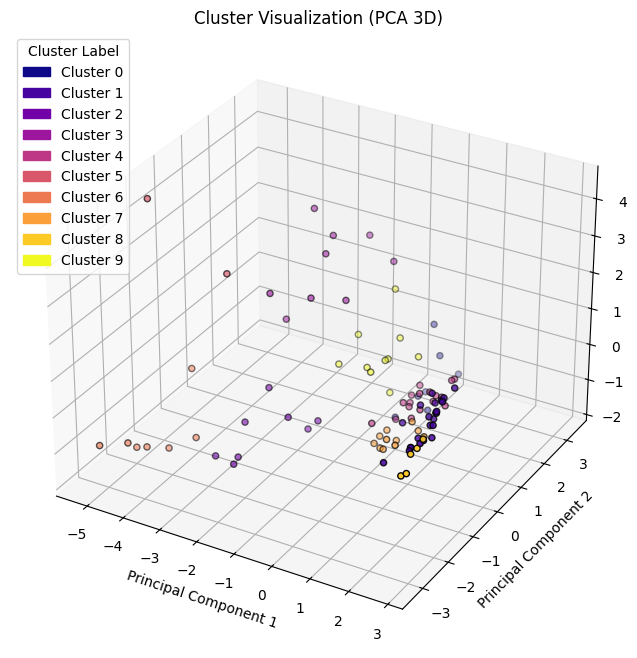

In [240]:
cp.plot_clusters(pollution_X, pollution_kmeans_clusters, 0, 1)
cp.plot_clusters(pollution_X, pollution_kmeans_clusters, 0, 2)
cp.plot_clusters(pollution_X, pollution_kmeans_clusters, 1, 2)
cp.plot_clusters(pollution_X, pollution_kmeans_clusters, 0, 1, 2)

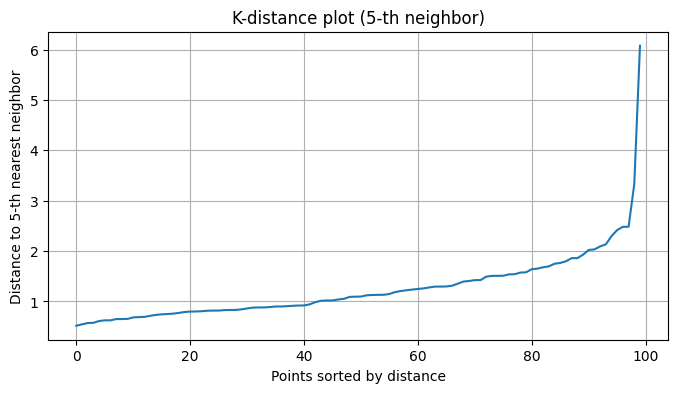

In [241]:
cp.dbscan_elbow_plot(pollution_X, n_neighbors=5)

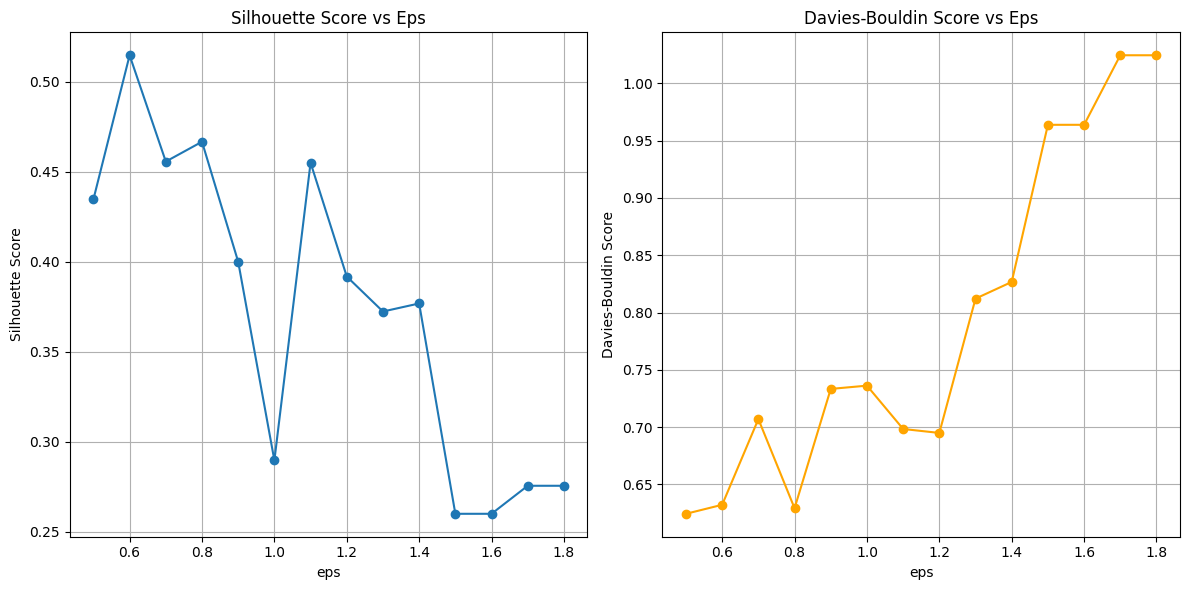

In [242]:
cp.dbscan_clustering_score_plots(pollution_X, min_samples=3)

In [243]:
pollution_dbscan_clusters = cp.dbscan_clustering(pollution_X, eps=0.6, min_samples=3)

2025-04-15 13:07:37,659 - INFO - Running DBSCAN with eps=0.6, min_samples=3.
2025-04-15 13:07:37,662 - INFO - DBSCAN found 5 clusters and 71 noise points.


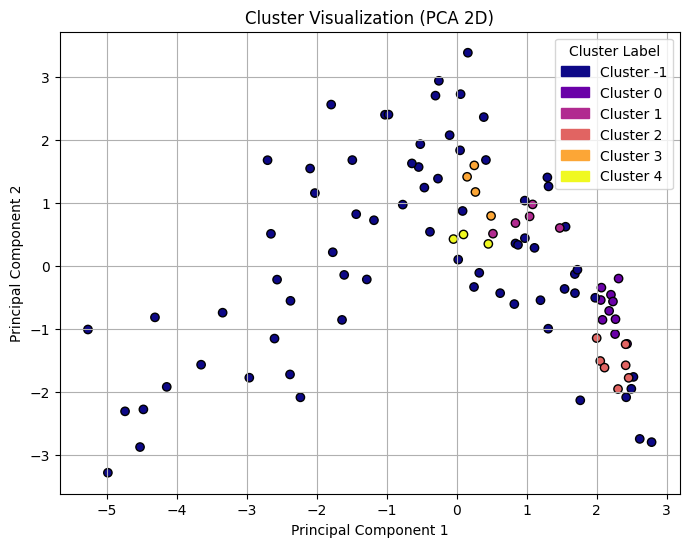

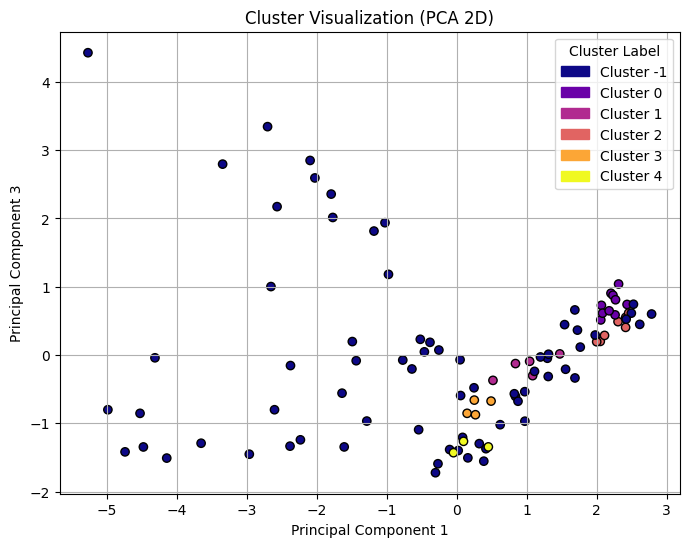

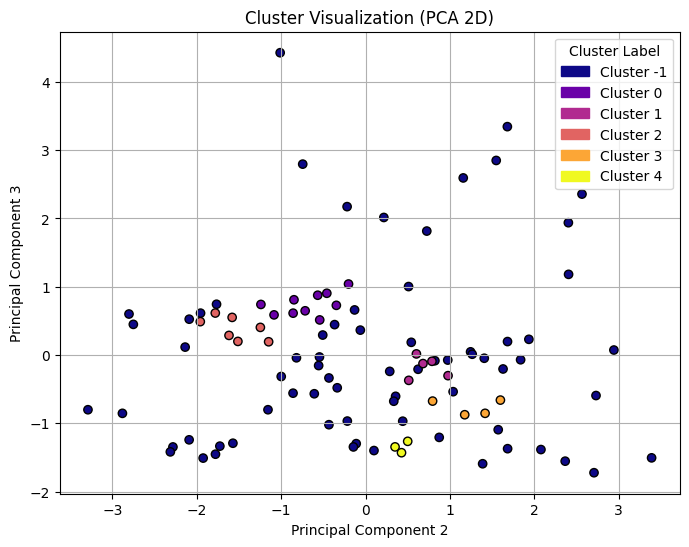

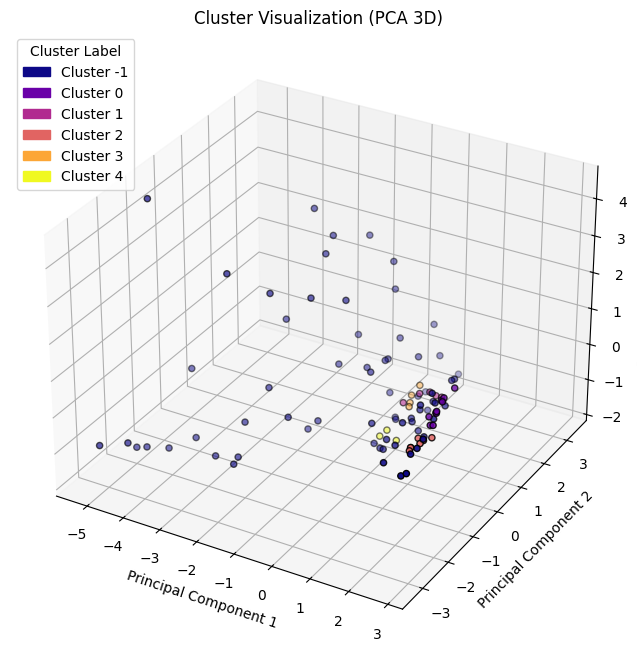

In [244]:
cp.plot_clusters(pollution_X, pollution_dbscan_clusters, 0, 1)
cp.plot_clusters(pollution_X, pollution_dbscan_clusters, 0, 2)
cp.plot_clusters(pollution_X, pollution_dbscan_clusters, 1, 2)
cp.plot_clusters(pollution_X, pollution_dbscan_clusters, 0, 1, 2)

## Add Labels to Output Df

In [245]:
transformed_output_df.head()

run_id  Resources_final  Resources_max  Resources_min  Resources_auc  \
0     1.0         0.013482            1.0       0.012950      67.206526   
1     2.0         0.000045            1.0       0.000045      51.009895   
2     3.0         0.010809            1.0       0.010809      70.233630   
3     4.0         0.016318            1.0       0.016318      74.944802   
4     5.0         0.000137            1.0       0.000137      64.836249   

   Resources_final_initial_diff  Resources_delta_25  Resources_delta_50  \
0                     -0.986518           -0.001908           -0.008547   
1                     -0.999955           -0.005797           -0.019693   
2                     -0.989191           -0.002555           -0.007302   
3                     -0.983682           -0.004887           -0.008939   
4                     -0.999863           -0.003191           -0.009570   

   Resources_delta_75  Resources_delta_100  ...  Pollution_auc  \
0           -0.039775            -0.000163  ...     116.316926   
1           -0.005408            -0.000003  ...     123.070621   
2           -0.025920            -0.002112  ...     113.628081   
3           -0.011405            -0.008193  ...      50.121846   
4           -0.027257            -0.000636  ...      89.860313   

   Pollution_final_initial_diff  Pollution_delta_25  Pollution_delta_50  \
0                      1.014576            0.000732            0.001455   
1                      1.070811            0.001877            0.003324   
2                      1.052842            0.001446            0.002349   
3                      0.450646            0.001870            0.002926   
4                      0.869236            0.001066            0.001869   

   Pollution_delta_75  Pollution_delta_100  Pollution_delta_125  \
0            0.008233             0.016480             0.000056   
1            0.009279             0.024890             0.001662   
2            0.005376             0.034101             0.003066   
3            0.003631             0.003365             0.002713   
4            0.003498             0.022283             0.005552   

   Pollution_delta_150  Pollution_delta_175  Pollution_delta_200  
0             0.000013             0.000013             0.000013  
1             0.000063             0.000003             0.000001  
2             0.000078             0.000017             0.000016  
3             0.001786             0.000906             0.000415  
4             0.000136             0.000005             0.000003  

[5 rows x 53 columns]

In [246]:
# Add cluster labels to the transformed DataFrame
transformed_output_df["resources_kmeans_cluster_id"] = resources_kmeans_clusters
transformed_output_df["resources_dbscan_cluster_id"] = resources_dbscan_clusters
transformed_output_df["economy_kmeans_cluster_id"] = economy_kmeans_clusters
transformed_output_df["economy_dbscan_cluster_id"] = economy_dbscan_clusters
transformed_output_df["bureaucracy_kmeans_cluster_id"] = bureaucracy_kmeans_clusters
transformed_output_df["bureaucracy_dbscan_cluster_id"] = bureaucracy_dbscan_clusters
transformed_output_df["pollution_kmeans_cluster_id"] = pollution_kmeans_clusters
transformed_output_df["pollution_dbscan_cluster_id"] = pollution_dbscan_clusters
transformed_output_df.head()


run_id  Resources_final  Resources_max  Resources_min  Resources_auc  \
0     1.0         0.013482            1.0       0.012950      67.206526   
1     2.0         0.000045            1.0       0.000045      51.009895   
2     3.0         0.010809            1.0       0.010809      70.233630   
3     4.0         0.016318            1.0       0.016318      74.944802   
4     5.0         0.000137            1.0       0.000137      64.836249   

   Resources_final_initial_diff  Resources_delta_25  Resources_delta_50  \
0                     -0.986518           -0.001908           -0.008547   
1                     -0.999955           -0.005797           -0.019693   
2                     -0.989191           -0.002555           -0.007302   
3                     -0.983682           -0.004887           -0.008939   
4                     -0.999863           -0.003191           -0.009570   

   Resources_delta_75  Resources_delta_100  ...  Pollution_delta_175  \
0           -0.039775            -0.000163  ...             0.000013   
1           -0.005408            -0.000003  ...             0.000003   
2           -0.025920            -0.002112  ...             0.000017   
3           -0.011405            -0.008193  ...             0.000906   
4           -0.027257            -0.000636  ...             0.000005   

   Pollution_delta_200  resources_kmeans_cluster_id  \
0             0.000013                            0   
1             0.000001                            1   
2             0.000016                            0   
3             0.000415                            3   
4             0.000003                            0   

   resources_dbscan_cluster_id  economy_kmeans_cluster_id  \
0                            1                          0   
1                            0                          1   
2                            1                          0   
3                           -1                          4   
4                            1                          0   

   economy_dbscan_cluster_id  bureaucracy_kmeans_cluster_id  \
0                         -1                              0   
1                         -1                              0   
2                         -1                              0   
3                         -1                              3   
4                         -1                              0   

   bureaucracy_dbscan_cluster_id  pollution_kmeans_cluster_id  \
0                              0                            4   
1                             -1                            7   
2                              0                            0   
3                              1                            2   
4                             -1                            9   

   pollution_dbscan_cluster_id  
0                            3  
1                           -1  
2                           -1  
3                           -1  
4                           -1  

[5 rows x 61 columns]

In [247]:
# Combine the cluster labels into a single label for kmeans and DBSCAN
transformed_output_df["kmeans_cluster_id"] = transformed_output_df[["resources_kmeans_cluster_id", 
                                                                      "economy_kmeans_cluster_id", 
                                                                      "bureaucracy_kmeans_cluster_id", 
                                                                      "pollution_kmeans_cluster_id"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
transformed_output_df["dbscan_cluster_id"] = transformed_output_df[["resources_dbscan_cluster_id",
                                                                      "economy_dbscan_cluster_id", 
                                                                      "bureaucracy_dbscan_cluster_id", 
                                                                      "pollution_dbscan_cluster_id"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
transformed_output_df.head()

run_id  Resources_final  Resources_max  Resources_min  Resources_auc  \
0     1.0         0.013482            1.0       0.012950      67.206526   
1     2.0         0.000045            1.0       0.000045      51.009895   
2     3.0         0.010809            1.0       0.010809      70.233630   
3     4.0         0.016318            1.0       0.016318      74.944802   
4     5.0         0.000137            1.0       0.000137      64.836249   

   Resources_final_initial_diff  Resources_delta_25  Resources_delta_50  \
0                     -0.986518           -0.001908           -0.008547   
1                     -0.999955           -0.005797           -0.019693   
2                     -0.989191           -0.002555           -0.007302   
3                     -0.983682           -0.004887           -0.008939   
4                     -0.999863           -0.003191           -0.009570   

   Resources_delta_75  Resources_delta_100  ...  resources_kmeans_cluster_id  \
0           -0.039775            -0.000163  ...                            0   
1           -0.005408            -0.000003  ...                            1   
2           -0.025920            -0.002112  ...                            0   
3           -0.011405            -0.008193  ...                            3   
4           -0.027257            -0.000636  ...                            0   

   resources_dbscan_cluster_id  economy_kmeans_cluster_id  \
0                            1                          0   
1                            0                          1   
2                            1                          0   
3                           -1                          4   
4                            1                          0   

   economy_dbscan_cluster_id  bureaucracy_kmeans_cluster_id  \
0                         -1                              0   
1                         -1                              0   
2                         -1                              0   
3                         -1                              3   
4                         -1                              0   

   bureaucracy_dbscan_cluster_id  pollution_kmeans_cluster_id  \
0                              0                            4   
1                             -1                            7   
2                              0                            0   
3                              1                            2   
4                             -1                            9   

   pollution_dbscan_cluster_id  kmeans_cluster_id  dbscan_cluster_id  
0                            3            0-0-0-4           1--1-0-3  
1                           -1            1-1-0-7         0--1--1--1  
2                           -1            0-0-0-0          1--1-0--1  
3                           -1            3-4-3-2         -1--1-1--1  
4                           -1            0-0-0-9         1--1--1--1  

[5 rows x 63 columns]

In [248]:
print(transformed_output_df["kmeans_cluster_id"].unique())
print(transformed_output_df["dbscan_cluster_id"].unique())

['0-0-0-4' '1-1-0-7' '0-0-0-0' '3-4-3-2' '0-0-0-9' '3-0-6-9' '1-6-2-8'
 '0-0-7-0' '3-0-3-9' '1-1-2-1' '3-2-1-3' '0-1-7-4' '1-1-7-4' '0-0-0-7'
 '0-1-0-4' '2-5-4-6' '1-1-2-8' '3-3-5-5' '0-0-6-3' '2-0-3-6' '1-1-0-1'
 '3-0-0-2' '2-4-3-6' '3-2-6-3' '1-1-7-1' '3-3-1-3' '3-0-3-2' '0-0-6-9'
 '3-3-1-5' '1-0-0-1' '0-0-6-0' '1-1-0-4' '0-0-0-1' '1-1-7-7']
['1--1-0-3' '0--1--1--1' '1--1-0--1' '-1--1-1--1' '1--1--1--1'
 '-1--1--1--1' '0--1-3-0' '2--1--1--1' '-1--1--1-1' '-1--1-2--1'
 '0-0--1--1' '1-1-0--1' '1--1-0-1' '0--1--1-2' '0-3-4-0' '0-3--1-0'
 '0--1-4--1' '0--1-5--1' '0-2-5-2' '0-0--1-2' '-1--1-6--1' '0--1-5-2'
 '0--1--1-0' '1--1-0-4' '1--1-6--1' '0--1-3-2' '0--1-0--1' '0--1-3--1'
 '-1--1-0-4' '0--1--1-1' '0--1-0-1' '0-0-4-0' '0-2-0--1']


In [249]:
# transformed_output_df.to_csv(os.path.join(porcessed_data_dir, f'transformed_output_with_{k}_clusters.csv'), index=False)

In [265]:
# Remove the rows where there a more than 7 elements in the dbscan cluster id string
transformed_output_df = transformed_output_df[transformed_output_df["dbscan_cluster_id"].apply(lambda x: len(x.split('-')) <= 4)]

In [266]:
# Create a new df to map run_id to cluster_id
cluster_mapping_df = transformed_output_df[["run_id", "kmeans_cluster_id", "dbscan_cluster_id"]]
cluster_mapping_df

run_id kmeans_cluster_id dbscan_cluster_id
19    20.0           1-1-2-1           0-3-4-0
40    41.0           1-1-0-1           0-2-5-2
61    62.0           1-1-0-1           0-2-5-2
94    95.0           1-1-2-1           0-0-4-0

In [251]:
# Check for duplicates in the mapping DataFrame
print('duplicates: ', cluster_mapping_df.duplicated().sum())
# Check for null values in the mapping DataFrame
print('null values: \n', cluster_mapping_df.isnull().sum())

duplicates:  0
null values: 
 run_id               0
kmeans_cluster_id    0
dbscan_cluster_id    0
dtype: int64


In [252]:
output_df.head()

Resources   Economy  Bureaucracy  Pollution  time  run_id
0   1.000000  0.100000     0.010000   0.001000   0.0     1.0
1   0.999951  0.100172     0.010046   0.001101   0.2     1.0
2   0.999901  0.100345     0.010093   0.001203   0.4     1.0
3   0.999849  0.100519     0.010140   0.001304   0.6     1.0
4   0.999796  0.100694     0.010187   0.001406   0.8     1.0

In [253]:
# Merge the cluster mapping DataFrame with the original output DataFrame
output_df_with_labels = output_df.merge(cluster_mapping_df, on="run_id", how="left")
output_df_with_labels.head()

Resources   Economy  Bureaucracy  Pollution  time  run_id  \
0   1.000000  0.100000     0.010000   0.001000   0.0     1.0   
1   0.999951  0.100172     0.010046   0.001101   0.2     1.0   
2   0.999901  0.100345     0.010093   0.001203   0.4     1.0   
3   0.999849  0.100519     0.010140   0.001304   0.6     1.0   
4   0.999796  0.100694     0.010187   0.001406   0.8     1.0   

  kmeans_cluster_id dbscan_cluster_id  
0           0-0-0-4          1--1-0-3  
1           0-0-0-4          1--1-0-3  
2           0-0-0-4          1--1-0-3  
3           0-0-0-4          1--1-0-3  
4           0-0-0-4          1--1-0-3

In [254]:
output_df_with_labels.tail()

Resources   Economy   Bureaucracy  Pollution   time  run_id  \
100095   0.000209  0.020162  9.452395e-07   1.143534  199.2   100.0   
100096   0.000209  0.020162  9.224389e-07   1.143534  199.4   100.0   
100097   0.000209  0.020162  9.001884e-07   1.143534  199.6   100.0   
100098   0.000209  0.020162  8.784745e-07   1.143534  199.8   100.0   
100099   0.000209  0.020162  8.572844e-07   1.143534  200.0   100.0   

       kmeans_cluster_id dbscan_cluster_id  
100095           1-1-7-7        0--1--1--1  
100096           1-1-7-7        0--1--1--1  
100097           1-1-7-7        0--1--1--1  
100098           1-1-7-7        0--1--1--1  
100099           1-1-7-7        0--1--1--1

In [255]:
# Sanity check that each run id is only in one cluster
output_df_with_labels.groupby("run_id")["kmeans_cluster_id"].nunique().value_counts()

kmeans_cluster_id
1    100
Name: count, dtype: int64

In [256]:

# File name for the processed data
processed_data_file = os.path.join(porcessed_data_dir, f'bardis_ensemble_per_stock_labels.csv')
# Save the output DataFrame with cluster labels
output_df_with_labels.to_csv(processed_data_file, index=False)

print(f"Processed data saved to {processed_data_file}")


Processed data saved to /home/tony-ubuntu/decision_sciences/looking_back_to_look_forward/results_analysis/processed_data/bardis_ensemble_per_stock_labels.csv
